
## Exploratory Data Analysis on Credit Card loan clients

#### Business Objective
- This aims to identify patterns which indicates if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending  at a higher interest rate, etc. This EDA will ensure that the consumers are capable of repaying the loan are not rejected. 

- In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

- Research is also about risk analytics - understanding the types of variables and their significance should be enough).

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)
pd.set_option('display.width', 1000)


In [2]:
# Read CSV file - Application Data into dataframe
df_app = pd.read_csv("G:/Machine-learning/EDA/application_data.csv")

In [3]:
# Reading head of dataframe
df_app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [4]:
# check the shape of data
rows, columns = df_app.shape
print(rows)
print(columns)
# there are 307511 rows and 122 columns in the original application data set

307511
122


In [5]:
# describe the dataframe for numerical columns to check the mean, std etc.
df_app.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [6]:
df_app.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'], dtype='object', length=122)

In [7]:
# As data set is huge, converting it to train and test dataframe using random.ran function of numpy in ratio of 80:20 and wwe can perform analysis on 20% data
np.random.seed(100)
msk = np.random.rand(len(df_app)) < 0.8
df_app_train = df_app[msk]
df_app_test = df_app[~msk]

In [8]:
# check the shape of test and train dataframe

In [9]:
df_app_train.shape

(245882, 122)

In [10]:
df_app_test.shape

(61629, 122)

In [11]:
# describe the test dataframe to check the numerical columns
df_app_test.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,61629.000000,61629.000000,61629.000000,6.162900e+04,6.162900e+04,61628.000000,6.158200e+04,61629.000000,61629.000000,61629.000000,61629.000000,61629.000000,20994.000000,61629.000000,61629.000000,61629.000000,61629.000000,61629.000000,61629.000000,61629.000000,61629.000000,61629.000000,61629.000000,61629.000000,61629.000000,61629.000000,61629.000000,61629.000000,61629.000000,26764.000000,61485.000000,49341.000000,30394.000000,25658.000000,31629.000000,20611.000000,18496.000000,28768.000000,30651.000000,31029.000000,19722.000000,25059.000000,19431.000000,30752.000000,18744.000000,27642.000000,30394.000000,25658.000000,31629.000000,20611.000000,18496.000000,28768.000000,30651.000000,31029.000000,19722.000000,25059.000000,19431.000000,30752.000000,18744.000000,27642.000000,30394.000000,25658.000000,31629.000000,20611.000000,18496.000000,28768.000000,30651.000000,31029.000000,19722.000000,25059.000000,19431.000000,30752.00000,18744.000000,27642.000000,31966.000000,61438.000000,61438.000000,61438.000000,61438.000000,61628.000000,61629.000000,61629.000000,61629.000000,61629.000000,61629.000000,61629.000000,61629.000000,61629.000000,61629.000000,61629.000000,61629.0,61629.000000,61629.000000,61629.000000,61629.000000,61629.000000,61629.000000,61629.000000,61629.000000,61629.000000,53365.000000,53365.000000,53365.000000,53365.000000,53365.000000,53365.000000
mean,278408.794999,0.080871,0.415567,1.687029e+05,6.028043e+05,27219.462769,5.419060e+05,0.020950,-16055.404420,64034.868990,-4996.996706,-2998.597673,12.040297,0.999984,0.819241,0.200474,0.997988,0.284720,0.057035,2.152023,2.050934,2.029272,12.084262,0.015463,0.050836,0.040306,0.078470,0.231417,0.179153,0.502537,0.514924,0.509220,0.117278,0.088379,0.977946,0.751092,0.044436,0.078890,0.149867,0.226058,0.231789,0.066118,0.100276,0.107381,0.009578,0.028005,0.114131,0.087422,0.977318,0.758298,0.042531,0.074623,0.145344,0.222154,0.227854,0.064906,0.105216,0.105969,0.008880,0.026607,0.117678,0.087809,0.977972,0.754388,0.044443,0.077990,0.149347,0.225667,0.231503,0.066986,0.101447,0.10859,0.009461,0.0

In [12]:
df_app_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,245882.000000,245882.000000,245882.000000,2.458820e+05,2.458820e+05,245871.000000,2.456510e+05,245882.000000,245882.000000,245882.000000,245882.000000,245882.000000,83588.000000,245882.0,245882.000000,245882.000000,245882.000000,245882.000000,245882.000000,245880.000000,245882.000000,245882.000000,245882.000000,245882.000000,245882.000000,245882.000000,245882.000000,245882.000000,245882.000000,107369.000000,2.453660e+05,197205.000000,121056.000000,101910.000000,125875.000000,82412.000000,74150.000000,114852.000000,122032.000000,123462.000000,79147.000000,99862.000000,77881.000000,122409.000000,75253.000000,110187.000000,121056.000000,101910.000000,125875.000000,82412.000000,74150.000000,114852.000000,122032.000000,123462.000000,79147.000000,99862.000000,77881.000000,122409.000000,75253.000000,110187.000000,121056.000000,101910.000000,125875.000000,82412.000000,74150.000000,114852.000000,122032.000000,123462.000000,79147.000000,99862.000000,77881.000000,122409.000000,75253.000000,110187.000000,127114.000000,245052.000000,245052.000000,245052.000000,245052.000000,245882.000000,245882.000000,245882.000000,245882.000000,245882.000000,245882.000000,245882.000000,245882.000000,245882.000000,245882.000000,245882.000000,245882.000000,245882.000000,245882.000000,245882.000000,245882.000000,245882.000000,245882.000000,245882.000000,245882.000000,245882.000000,212627.000000,212627.000000,212627.000000,212627.000000,212627.000000,212627.000000
mean,278123.302320,0.080693,0.417424,1.688217e+05,5.980790e+05,27080.779421,5.375163e+05,0.020848,-16032.380862,63759.948431,-4983.394222,-2993.100715,12.066313,1.0,0.820052,0.199091,0.998170,0.280151,0.056641,2.152827,2.052846,2.032084,12.058195,0.015064,0.050752,0.040747,0.078098,0.230212,0.179655,0.502028,5.142594e-01,0.511262,0.117481,0.088458,0.977682,0.752816,0.044667,0.078954,0.149689,0.226338,0.231920,0.066387,0.100899,0.107404,0.008617,0.028446,0.114256,0.087574,0.977002,0.759972,0.042559,0.074456,0.145155,0.222355,0.228109,0.064971,0.105752,0.105977,0.007876,0.027126,0.117893,0.087992,0.977697,0.756086,

In [13]:
# Here we can see that the data of describe function similar for both original application data and test application data, 
# the only difference is of count.


In [14]:
# TO check the number of null values in each column of dataframe
df_app_test.isnull().sum(axis = 0)

SK_ID_CURR                          0
TARGET                              0
NAME_CONTRACT_TYPE                  0
CODE_GENDER                         0
FLAG_OWN_CAR                        0
FLAG_OWN_REALTY                     0
CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
AMT_CREDIT                          0
AMT_ANNUITY                         1
AMT_GOODS_PRICE                    47
NAME_TYPE_SUITE                   261
NAME_INCOME_TYPE                    0
NAME_EDUCATION_TYPE                 0
NAME_FAMILY_STATUS                  0
NAME_HOUSING_TYPE                   0
REGION_POPULATION_RELATIVE          0
DAYS_BIRTH                          0
DAYS_EMPLOYED                       0
DAYS_REGISTRATION                   0
DAYS_ID_PUBLISH                     0
OWN_CAR_AGE                     40635
FLAG_MOBIL                          0
FLAG_EMP_PHONE                      0
FLAG_WORK_PHONE                     0
FLAG_CONT_MOBILE                    0
FLAG_PHONE  

In [15]:
# check the percentage of null values in column
round(100*(df_app_test.isnull().sum(axis = 0)/len(df_app_test.index)),2)

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.08
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     65.93
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE  

In [16]:
# drop the columns with null values greater than the 40% as they directly impact on analysis
df_app_test.drop(['OWN_CAR_AGE','EXT_SOURCE_1','EXT_SOURCE_3','APARTMENTS_AVG','BASEMENTAREA_AVG','YEARS_BUILD_AVG','COMMONAREA_AVG',
              'ELEVATORS_AVG','ENTRANCES_AVG','FLOORSMAX_AVG','FLOORSMIN_AVG','LANDAREA_AVG','LIVINGAPARTMENTS_AVG',
              'NONLIVINGAPARTMENTS_AVG','NONLIVINGAREA_AVG','APARTMENTS_MODE','BASEMENTAREA_MODE',
              'YEARS_BUILD_MODE','COMMONAREA_MODE','ELEVATORS_MODE','ENTRANCES_MODE','FLOORSMAX_MODE',
              'FLOORSMIN_MODE','LANDAREA_MODE','LIVINGAPARTMENTS_MODE','LIVINGAREA_MODE','NONLIVINGAPARTMENTS_MODE',
              'NONLIVINGAREA_MODE','APARTMENTS_MEDI','BASEMENTAREA_MEDI','YEARS_BUILD_MEDI','COMMONAREA_MEDI','ELEVATORS_MEDI',
              'ENTRANCES_MEDI','FLOORSMAX_MEDI','FLOORSMIN_MEDI','LANDAREA_MEDI','LIVINGAPARTMENTS_MEDI','LIVINGAREA_MEDI',
              'NONLIVINGAPARTMENTS_MEDI','NONLIVINGAREA_MEDI','FONDKAPREMONT_MODE','HOUSETYPE_MODE','TOTALAREA_MODE',
              'WALLSMATERIAL_MODE','EMERGENCYSTATE_MODE','YEARS_BEGINEXPLUATATION_AVG','LIVINGAREA_AVG','YEARS_BEGINEXPLUATATION_MODE',
             'YEARS_BEGINEXPLUATATION_MEDI'],axis = 1,inplace=True)

In [17]:
# Check the shape of the dataframe and we are left with 72 columns out of 122 after drop.
df_app_test.shape

(61629, 72)

In [18]:
round(100*(df_app_test.isnull().sum(axis = 0)/len(df_app_test.index)),2)

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.08
NAME_TYPE_SUITE                 0.42
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
FLAG_MOBIL                      0.00
FLAG_EMP_PHONE                  0.00
FLAG_WORK_PHONE                 0.00
FLAG_CONT_MOBILE                0.00
FLAG_PHONE                      0.00
FLAG_EMAIL                      0.00
O

In [19]:
df_app_test.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,61629.000000,61629.000000,61629.000000,6.162900e+04,6.162900e+04,61628.000000,6.158200e+04,61629.000000,61629.000000,61629.000000,61629.000000,61629.000000,61629.000000,61629.000000,61629.000000,61629.000000,61629.000000,61629.000000,61629.000000,61629.000000,61629.000000,61629.000000,61629.000000,61629.000000,61629.000000,61629.000000,61629.000000,61629.000000,61485.000000,61438.000000,61438.000000,61438.000000,61438.000000,61628.000000,61629.000000,61629.000000,61629.000000,61629.000000,61629.000000,61629.000000,61629.000000,61629.000000,61629.000000,61629.000000,61629.0,61629.000000,61629.000000,61629.000000,61629.000000,61629.000000,61629.000000,61629.000000,61629.000000,61629.000000,53365.000000,53365.000000,53365.000000,53365.000000,53365.000000,53365.000000
mean,278408.794999,0.080871,0.415567,1.687029e+05,6.028043e+05,27219.462769,5.419060e+05,0.020950,-16055.404420,64034.868990,-4996.996706,-2998.597673,0.999984,0.819241,0.200474,0.997988,0.284720,0.057035,2.152023,2.050934,2.029272,12.084262,0.015463,0.050836,0.040306,0.078470,0.231417,0.179153,0.514924,1.433299,0.143820,1.415801,0.098669,-967.391024,0.000016,0.710850,0.000081,0.015139,0.088903,0.000243,0.080660,0.004040,0.000049,0.004057,0.0,0.003862,0.003099,0.001103,0.009995,0.000308,0.008162,0.000535,0.000503,0.000389,0.006071,0.006709,0.034480,0.270983,0.267104,1.908779
std,102936.746791,0.272639,0.721643,1.214669e+05,4.053125e+05,14527.159300,3.728153e+05,0.013838,4374.010048,141478.908653,3523.460883,1502.906162,0.004028,0.384822,0.400358,0.044811,0.451285,0.231911,0.909238,0.509294,0.502043,3.244347,0.123388,0.219665,0.196677,0.268911,0.421742,0.383483,0.190783,2.358422,0.444216,2.337945,0.355991,832.472135,0.004028,0.453371,0.009007,0.122107,0.284606,0.015599,0.272315,0.063435,0.006977,0.063562,0.0,0.062024,0.055584,0.033199,0.099476,0.017556,0.089974,0.023134,0.022422,0.019730,0.080526,0.096951,0.196216,0.921110,0.611625,1.875640
min,100006.000000,0.000000,0.000000,2.610000e+04,4.500000e+04,2052.000000,4.500000e+04,0.000290,-25200.000000,-17912.000000,-24672.000000,-6274.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000001,0.000000,0.000000,0.000000,0.000000,-4173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189211.000000,0.000000,0.000000,1.125000e+05,2.700000e+05,16573.500000,2.385000e+05,0.010006,-19714.000000,-2784.000000,-7500.000000,-4300.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.392895,0.000000,0.000000,0.000000,0.000000,-1574.000000,0.0

In [20]:
df_app_test.shape

(61629, 72)

In [21]:
# number of rows with zero null values
len(df_app_test[df_app_test.isnull().sum(axis=1) == 0].index)

36358

In [22]:
# Number of rows with null values greater than 3
len(df_app_test[df_app_test.isnull().sum(axis=1) > 3 ].index)

8416

In [23]:
# We can drop the rows those having number of null values greater than 3 
df_app_test_final = df_app_test[df_app_test.isnull().sum(axis=1) <=3]
df_app_test_final.shape

(53213, 72)

In [24]:
round(100*(df_app_test.isnull().sum(axis = 0)/len(df_app_test.index)),2)

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.08
NAME_TYPE_SUITE                 0.42
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
FLAG_MOBIL                      0.00
FLAG_EMP_PHONE                  0.00
FLAG_WORK_PHONE                 0.00
FLAG_CONT_MOBILE                0.00
FLAG_PHONE                      0.00
FLAG_EMAIL                      0.00
O

In [25]:
# There are 6 columns with 13 % null values, we can impute them by whole number which is near to the mean value
df_app_test_final.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,53213.000000,53213.000000,53213.000000,5.321300e+04,5.321300e+04,53212.000000,5.317300e+04,53213.000000,53213.000000,53213.000000,53213.000000,53213.000000,53213.0,53213.000000,53213.000000,53213.000000,53213.000000,53213.000000,53213.000000,53213.000000,53213.000000,53213.000000,53213.000000,53213.000000,53213.000000,53213.000000,53213.000000,53213.000000,53098.000000,53213.000000,53213.000000,53213.000000,53213.000000,53213.000000,53213.0,53213.000000,53213.000000,53213.000000,53213.000000,53213.000000,53213.000000,53213.000000,53213.000000,53213.000000,53213.0,53213.000000,53213.000000,53213.000000,53213.000000,53213.000000,53213.000000,53213.000000,53213.000000,53213.000000,53213.000000,53213.000000,53213.000000,53213.000000,53213.000000,53213.000000
mean,278238.985173,0.078176,0.421269,1.707211e+05,6.101880e+05,27273.021677,5.485532e+05,0.020925,-16127.546257,63857.223742,-4999.199275,-3052.672542,1.0,0.819593,0.199669,0.997839,0.290474,0.058444,2.162103,2.053089,2.031308,12.100953,0.014527,0.049856,0.040141,0.075545,0.226223,0.176329,0.517582,1.442880,0.143067,1.425404,0.098228,-991.622893,0.0,0.716441,0.000075,0.014884,0.088757,0.000244,0.080751,0.003928,0.000056,0.003740,0.0,0.004191,0.003401,0.001222,0.010806,0.000319,0.008475,0.000526,0.000583,0.000338,0.006089,0.006728,0.034503,0.270780,0.267190,1.909477
std,102911.438941,0.268451,0.726526,1.111203e+05,4.078853e+05,14393.013331,3.752112e+05,0.013751,4324.783602,141400.025654,3528.698515,1484.298734,0.0,0.384530,0.399755,0.046438,0.453985,0.234584,0.911061,0.506275,0.498887,3.234024,0.119649,0.217650,0.196291,0.264272,0.418389,0.381103,0.189715,2.363112,0.441492,2.343112,0.354298,839.358215,0.0,0.450729,0.008670,0.121088,0.284395,0.015628,0.272455,0.062548,0.007508,0.061039,0.0,0.064600,0.058223,0.034929,0.103388,0.017871,0.091672,0.022933,0.024130,0.018389,0.080640,0.097089,0.196309,0.920497,0.611552,1.874937
min,100010.000000,0.000000,0.000000,2.655000e+04,4.500000e+04,2052.000000,4.500000e+04,0.000290,-25200.000000,-17912.000000,-24672.000000,-6274.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000001,0.000000,0.000000,0.000000,0.000000,-4173.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189103.000000,0.000000,0.000000,1.125000e+05,2.736360e+05,16695.000000,2.385000e+05,0.010006,-19734.000000,-2868.000000,-7505.000000,-4318.000000,1.0,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.398514,0.000000,0.000000,0.000000,0.000000,-1606.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000

In [26]:
df_app_test_fillna = df_app_test.fillna({
    'AMT_REQ_CREDIT_BUREAU_HOUR':0,
    'AMT_REQ_CREDIT_BUREAU_DAY':0,
    'AMT_REQ_CREDIT_BUREAU_WEEK':0,
    'AMT_REQ_CREDIT_BUREAU_MON':0,
    'AMT_REQ_CREDIT_BUREAU_QRT':0,
    
})

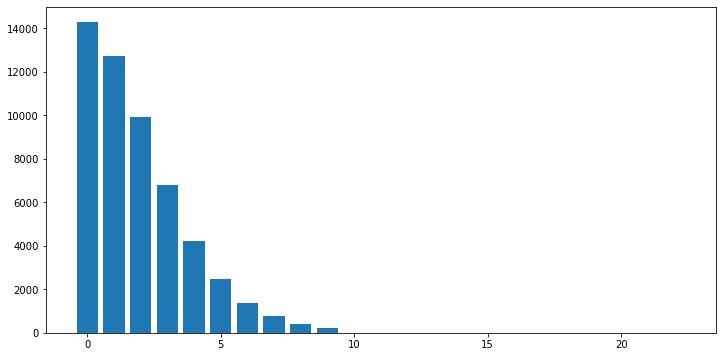

In [27]:
# Standard
plt.figure(figsize=(12, 6))
x = df_app_test_final['AMT_REQ_CREDIT_BUREAU_YEAR']
unique, counts =np.unique(x, return_counts=True)
plt.bar(unique,counts)
plt.show()

In [28]:
# Reporting the columns those have very less %age of null values and suggest the way to impute it in different dataframe without impacting the original ones
# for Column "AMT_GOODS_PRICE", null value percentage is minute "0.09"
# checking its descriptive statistics
df_app_test_final['AMT_GOODS_PRICE'].describe()

count    5.317300e+04
mean     5.485532e+05
std      3.752112e+05
min      4.500000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.885000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [29]:
# Reporting the columns those have very less %age of null values and suggest the way to impute it in different dataframe without impacting the original ones
# for Column "AMT_GOODS_PRICE", null value percentage is minute "0.09"
# checking its descriptive statistics
df_app_test_final['AMT_GOODS_PRICE'].describe()
# for column "NAME_TYPE_SUITE", there is "0.38%" null values

count    5.317300e+04
mean     5.485532e+05
std      3.752112e+05
min      4.500000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.885000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [30]:
# for columns "OBS_30_CNT_SOCIAL_CIRCLE", "DEF_30_CNT_SOCIAL_CIRCLE ","OBS_60_CNT_SOCIAL_CIRCLE","DEF_60_CNT_SOCIAL_CIRCLE", we have 30 % missing values.
# check the decriptive stats
df_app_test_final[['OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE']].describe()

,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE
count,53213.000000,53213.000000,53213.000000,53213.000000
mean,1.442880,0.143067,1.425404,0.098228
std,2.363112,0.441492,2.343112,0.354298
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,2.000000,0.000000
max,47.000000,6.000000,47.000000,5.000000


In [31]:
# As per descriptive stats,
# We can fill null values of column "OBS_30_CNT_SOCIAL_CIRCLE" by "1" because of its mean value
# We can fill null values of column "DEF_30_CNT_SOCIAL_CIRCLE" by "0" because of its mean value
# We can fill null values of column "OBS_60_CNT_SOCIAL_CIRCLE" by "1" because of its mean value
# We can fill null values of column "OBS_60_CNT_SOCIAL_CIRCLE" by "0" because of its mean value

In [32]:
# Imputing column "AMT_REQ_CREDIT_BUREAU_QRT " required for analysis
df_app_test_final.fillna({
    'AMT_REQ_CREDIT_BUREAU_QRT':0
})

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,1530000.0,Unaccompanied,State servant,Higher education,Married,House / apartment,0.003122,-18850,-449,-4597.0,-2379,1,1,1,1,0,0,Managers,2.0,3,3,MONDAY,16,0,0,0,0,1,1,Other,0.714279,2.0,0.0,2.0,0.0,-1070.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
10,100014,0,Cash loans,F,N,Y,1,112500.0,652500.0,21177.0,652500.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.022800,-10197,-679,-4427.0,-738,1,1,0,1,0,0,Core staff,3.0,2,2,SATURDAY,15,0,0,0,0,0,0,Medicine,0.651862,0.0,0.0,0.0,0.0,-844.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0
15,100019,0,Cash loans,M,Y,Y,0,157500.0,299772.0,20160.0,247500.0,Family,Working,Secondary / secondary special,Single / not married,Rented apartment,0.020713,-8728,-1157,-3494.0,-1368,1,1,0,1,0,0,Laborers,1.0,3,3,SATURDAY,6,0,0,0,1,1,0,Business Entity Type 2,0.346634,0.0,0.0,0.0,0.0,-925.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
16,100020,0,Cash loans,M,N,N,0,108000.0,509602.5,26149.5,387000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.018634,-12931,-1317,-6392.0,-3866,1,1,0,1,0,0,Drivers,2.0,2,2,THURSDAY,12,0,0,0,1,1,0,Government,0.236378,0.0,0.0,0.0,0.0,-3.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0
18,100022,0,Revolving loans,F,N,Y,0,112500.0,157500.0,7875.0,157500.0,Other_A,Working,Secondary / secondary special,Widow,House / apartment,0.046220,-17718,-7804,-8751.0,-1259,1,1,0,1,1,0,Laborers,1.0,1,1,FRIDAY,13,0,0,0,0,0,0,Housing,0.706428,8.0,0.0,8.0,0.0,-239.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307473,456213,0,Cash loans,F,Y,Y,1,90000.0,258709.5,20439.0,234000.0,"Spouse, partner",Working,Secondary / secondary special,Married,House / apartment,0.020246,-14589,-2145,-2337.0,-6211,1,1,1,1,1,0,High skill tech staff,3.0,3,3,THURSDAY,13,0,0,0,0,0,0,Self-employed,0.264486,1.0,0.0,1.0,0.0,-637.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,2.0,1.0
307475,456215,1,Cash loans,F,N,N,1,144000.0,1303200.0,46809.0,1125000.0,Unaccompanied,Working,Higher education,Civil marriage,House / apartment,0.007330,-13416,-2405,-500.0,-4704,1,1,1,1,0,0,Laborers,3.0,2,2,THURSDAY,13,0,0,0,0,0,0,Construction,0.583214,0.0,0.0,0.0,0.0,-1492.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.

In [33]:
# Drop various columns based on assumption which do not matter much for analysis and for making a ML model
# drop the columns which are not strong identfiers and retain those which are strong identifiers.

In [34]:
df = df_app_test_final[['SK_ID_CURR','TARGET','NAME_CONTRACT_TYPE','FLAG_OWN_CAR','FLAG_OWN_REALTY','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','NAME_INCOME_TYPE','NAME_HOUSING_TYPE','DAYS_BIRTH','FLAG_MOBIL','FLAG_CONT_MOBILE','FLAG_EMAIL','REGION_RATING_CLIENT','REG_CITY_NOT_LIVE_CITY','ORGANIZATION_TYPE','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','AMT_REQ_CREDIT_BUREAU_QRT']]
df.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_HOUSING_TYPE,DAYS_BIRTH,FLAG_MOBIL,FLAG_CONT_MOBILE,FLAG_EMAIL,REGION_RATING_CLIENT,REG_CITY_NOT_LIVE_CITY,ORGANIZATION_TYPE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,AMT_REQ_CREDIT_BUREAU_QRT
7,100010,0,Cash loans,Y,Y,360000.0,1530000.0,42075.0,1530000.0,State servant,House / apartment,-18850,1,1,0,3,0,Other,1,0,0,0,0,0.0
10,100014,0,Cash loans,N,Y,112500.0,652500.0,21177.0,652500.0,Working,House / apartment,-10197,1,1,0,2,0,Medicine,1,0,0,0,0,0.0
15,100019,0,Cash loans,Y,Y,157500.0,299772.0,20160.0,247500.0,Working,Rented apartment,-8728,1,1,0,3,1,Business Entity Type 2,0,0,0,0,0,0.0
16,100020,0,Cash loans,N,N,108000.0,509602.5,26149.5,387000.0,Working,House / apartment,-12931,1,1,0,2,1,Government,1,0,0,0,0,1.0
18,100022,0,Revolving loans,N,Y,112500.0,157500.0,7875.0,157500.0,Working,House / apartment,-17718,1,1,0,1,0,Housing,1,0,0,0,0,0.0
21,100025,0,Cash loans,Y,Y,202500.0,1132573.5,37561.5,927000.0,Commercial associate,House / apartment,-14815,1,1,0,2,0,Trade: type 7,1,0,0,0,0,1.0
22,100026,0,Cash loans,N,N,450000.0,497520.0,32521.5,450000.0,Working,Rented apartment,-11146,1,1,0,3,0,Self-employed,1,0,0,0,0,0.0
35,100041,0,Cash loans,N,N,112500.0,450000.0,44509.5,450000.0,Working,House / apartment,-12158,1,1,0,2,0,Self-employed,1,0,0,0,0,0.0
36,100043,0,Cash loans,N,Y,198000.0,641173.5,23157.0,553500.0,Commercial associate,House / apartment,-17199,1,1,0,2,0,Other,1,0,0,0,0,1.0
38,100045,0,Cash loans,N,Y,99000.0,247275.0,17338.5,225000.0,Pensioner,House / apartment,-23920,1,1,0,2,0,XNA,1,0,0,0,0,0.0


#### performing sanity checks on df

In [35]:
df.shape

(53213, 24)

In [36]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH', 'FLAG_MOBIL', 'FLAG_CONT_MOBILE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT', 'REG_CITY_NOT_LIVE_CITY', 'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'AMT_REQ_CREDIT_BUREAU_QRT'], dtype='object')

In [37]:
df.dtypes

SK_ID_CURR                     int64
TARGET                         int64
NAME_CONTRACT_TYPE            object
FLAG_OWN_CAR                  object
FLAG_OWN_REALTY               object
AMT_INCOME_TOTAL             float64
AMT_CREDIT                   float64
AMT_ANNUITY                  float64
AMT_GOODS_PRICE              float64
NAME_INCOME_TYPE              object
NAME_HOUSING_TYPE             object
DAYS_BIRTH                     int64
FLAG_MOBIL                     int64
FLAG_CONT_MOBILE               int64
FLAG_EMAIL                     int64
REGION_RATING_CLIENT           int64
REG_CITY_NOT_LIVE_CITY         int64
ORGANIZATION_TYPE             object
FLAG_DOCUMENT_3                int64
FLAG_DOCUMENT_4                int64
FLAG_DOCUMENT_5                int64
FLAG_DOCUMENT_6                int64
FLAG_DOCUMENT_7                int64
AMT_REQ_CREDIT_BUREAU_QRT    float64
dtype: object

In [38]:
#df.describe()

####  Changing dtypes of columns into catogirical data type

In [39]:
df=df.astype({'TARGET': 'category','NAME_CONTRACT_TYPE':'category','FLAG_OWN_CAR':'category','FLAG_OWN_REALTY':'category','NAME_INCOME_TYPE':'category','NAME_HOUSING_TYPE':'category','FLAG_MOBIL':'category','FLAG_CONT_MOBILE':'category','FLAG_EMAIL':'category','REGION_RATING_CLIENT':'category','REG_CITY_NOT_LIVE_CITY':'category','ORGANIZATION_TYPE':'category','FLAG_DOCUMENT_3':'category','FLAG_DOCUMENT_4':'category','FLAG_DOCUMENT_5':'category','FLAG_DOCUMENT_6':'category','FLAG_DOCUMENT_7':'category'})

In [40]:
#changed data type
df.dtypes

SK_ID_CURR                      int64
TARGET                       category
NAME_CONTRACT_TYPE           category
FLAG_OWN_CAR                 category
FLAG_OWN_REALTY              category
AMT_INCOME_TOTAL              float64
AMT_CREDIT                    float64
AMT_ANNUITY                   float64
AMT_GOODS_PRICE               float64
NAME_INCOME_TYPE             category
NAME_HOUSING_TYPE            category
DAYS_BIRTH                      int64
FLAG_MOBIL                   category
FLAG_CONT_MOBILE             category
FLAG_EMAIL                   category
REGION_RATING_CLIENT         category
REG_CITY_NOT_LIVE_CITY       category
ORGANIZATION_TYPE            category
FLAG_DOCUMENT_3              category
FLAG_DOCUMENT_4              category
FLAG_DOCUMENT_5              category
FLAG_DOCUMENT_6              category
FLAG_DOCUMENT_7              category
AMT_REQ_CREDIT_BUREAU_QRT     float64
dtype: object

## Finding and removing outliers from numerical coloumns 

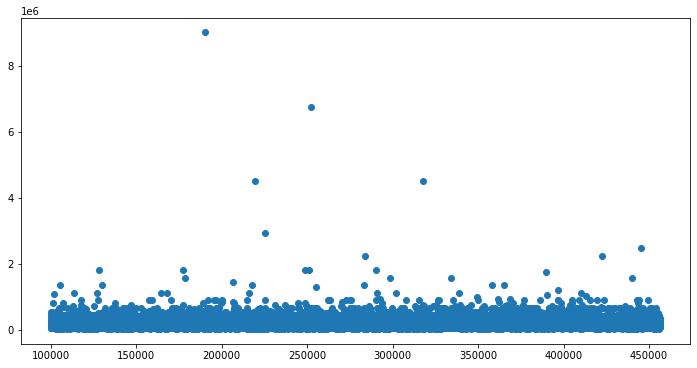

In [41]:
# Outliers of column "AMT_INCOME_TOTAL"
plt.figure(figsize=(12, 6))
plt.scatter(df['SK_ID_CURR'],df['AMT_INCOME_TOTAL'] )
plt.show()

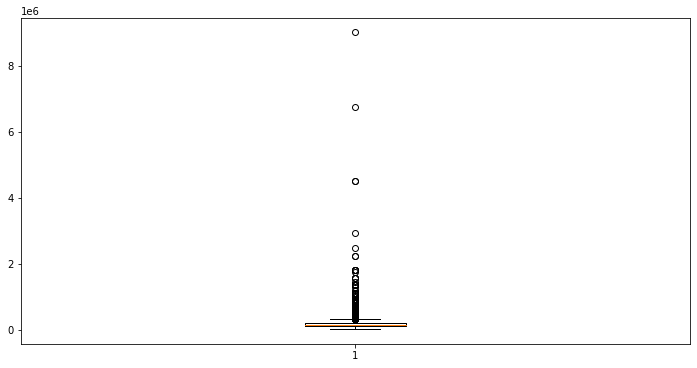

In [42]:
plt.figure (figsize=(12,6))
plt.boxplot(df['AMT_INCOME_TOTAL'])
plt.show()

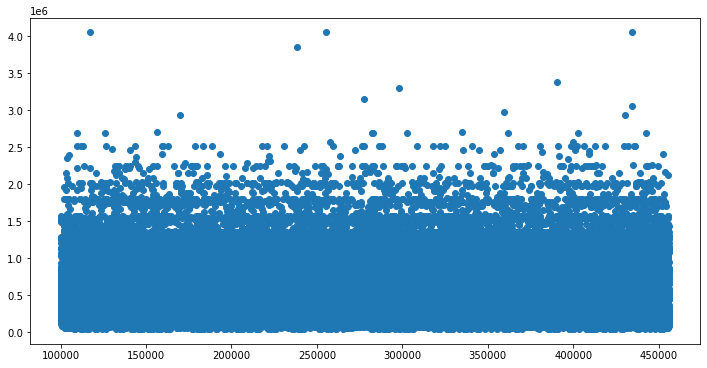

In [43]:
plt.figure(figsize=(12, 6))
plt.scatter(df['SK_ID_CURR'],df['AMT_CREDIT'] )
plt.show()

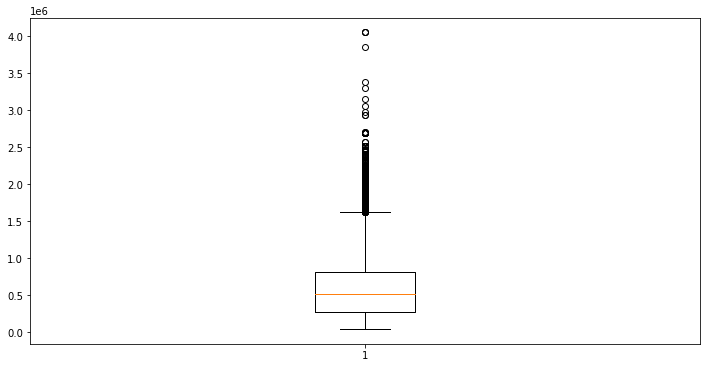

In [44]:
plt.figure (figsize=(12,6))
plt.boxplot(df['AMT_CREDIT'])
plt.show()

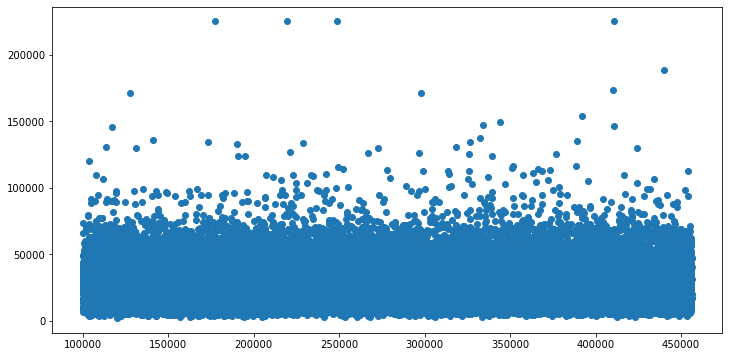

In [45]:
plt.figure(figsize=(12, 6))
plt.scatter(df['SK_ID_CURR'],df['AMT_ANNUITY'] )
plt.show()

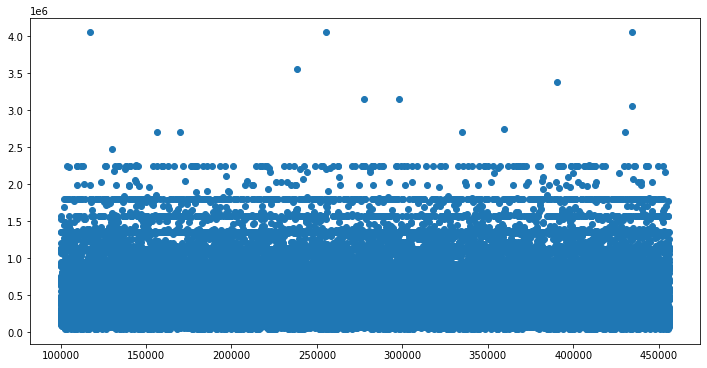

In [46]:
plt.figure(figsize=(12, 6))
plt.scatter(df['SK_ID_CURR'],df['AMT_GOODS_PRICE'] )
plt.show()

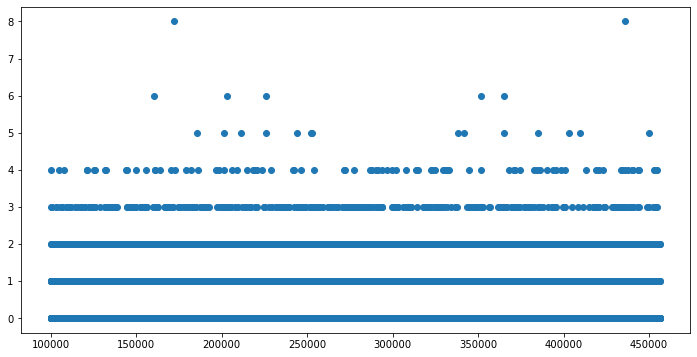

In [47]:
plt.figure(figsize=(12, 6))
plt.scatter(df['SK_ID_CURR'],df['AMT_REQ_CREDIT_BUREAU_QRT'] )
plt.show()

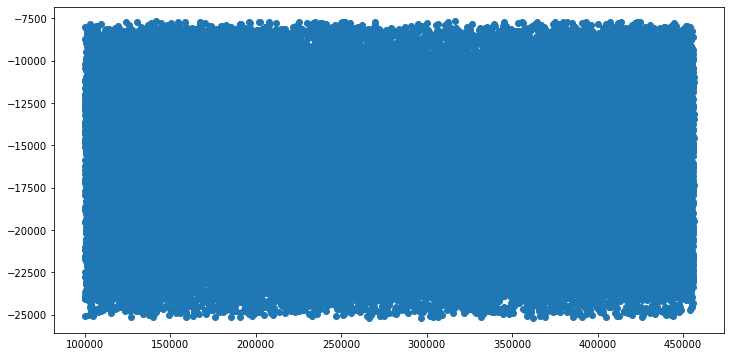

In [48]:
plt.figure(figsize=(12, 6))
plt.scatter(df['SK_ID_CURR'],df['DAYS_BIRTH'] )
plt.show() # birthdays has no outliers,so we remove none

#### creating new DataFrame df1 after removing outliers

In [49]:
#From above grops, we identified the outliers in numerical columns
df1=df[df['AMT_INCOME_TOTAL']<1500000] # retaining only the columns whos income is less than 1500000
df1=df1[df['AMT_CREDIT']<2600000] # retaining only the columns whos amount credit is less than 2600000
df1=df1[df['AMT_ANNUITY']<140000]  # retaining only the columns whos amount annunity is less than 140000
df1=df1[df['AMT_GOODS_PRICE']<2385000]  # retaining only the columns whos amount goods price is less than 2385000
df1=df1[df['AMT_REQ_CREDIT_BUREAU_QRT']<7]  # retaining only the columns whos credit rating is less than 7

#### Comapring DataFrames before and after the removal of outliers

In [50]:
print('Before ',df.shape ,'AND After ' ,df1.shape)
print('Total columns removed = ' ,df.shape[0]-df1.shape[0] )

Before  (53213, 24) AND After  (53124, 24)
Total columns removed =  89


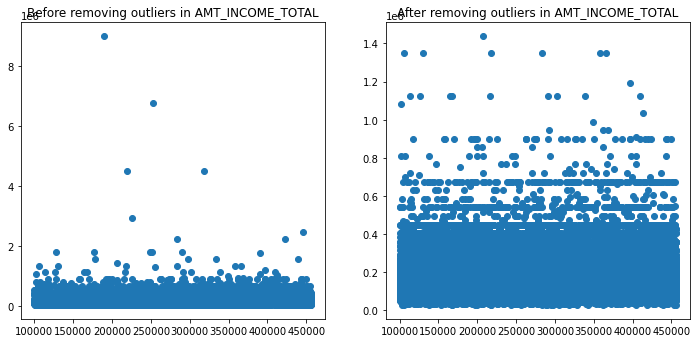

In [51]:
fig=plt.figure(figsize=(12,12))
ax1=fig.add_subplot(2,2,1)
ax2=fig.add_subplot(2,2,2)
ax1.set(title='Before removing outliers in AMT_INCOME_TOTAL')
ax1.scatter(df['SK_ID_CURR'],df['AMT_INCOME_TOTAL'] )
ax2.set(title='After removing outliers in AMT_INCOME_TOTAL')
ax2.scatter(df1['SK_ID_CURR'],df1['AMT_INCOME_TOTAL'] )
plt.show()

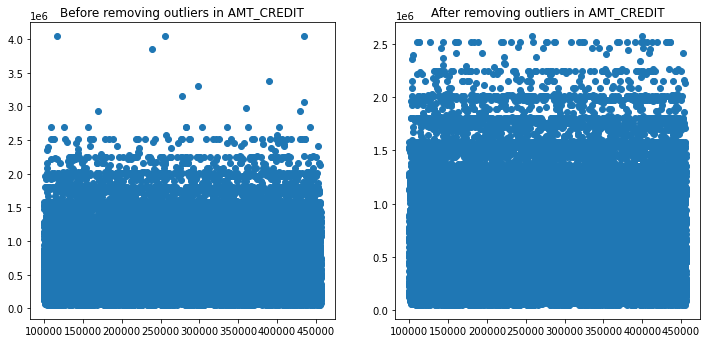

In [52]:
fig=plt.figure(figsize=(12,12))
ax1=fig.add_subplot(2,2,1)
ax2=fig.add_subplot(2,2,2)
ax1.set(title='Before removing outliers in AMT_CREDIT')
ax1.scatter(df['SK_ID_CURR'],df['AMT_CREDIT'] )
ax2.set(title='After removing outliers in AMT_CREDIT')
ax2.scatter(df1['SK_ID_CURR'],df1['AMT_CREDIT'] )
plt.show()

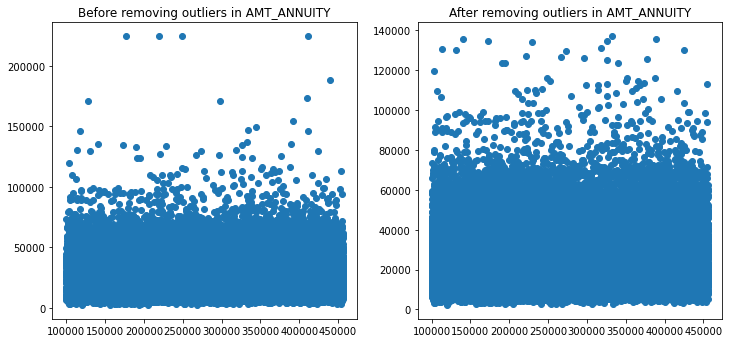

In [53]:
fig=plt.figure(figsize=(12,12))
ax1=fig.add_subplot(2,2,1)
ax2=fig.add_subplot(2,2,2)
ax1.set(title='Before removing outliers in AMT_ANNUITY')
ax1.scatter(df['SK_ID_CURR'],df['AMT_ANNUITY'] )
ax2.set(title='After removing outliers in AMT_ANNUITY')
ax2.scatter(df1['SK_ID_CURR'],df1['AMT_ANNUITY'] )
plt.show()

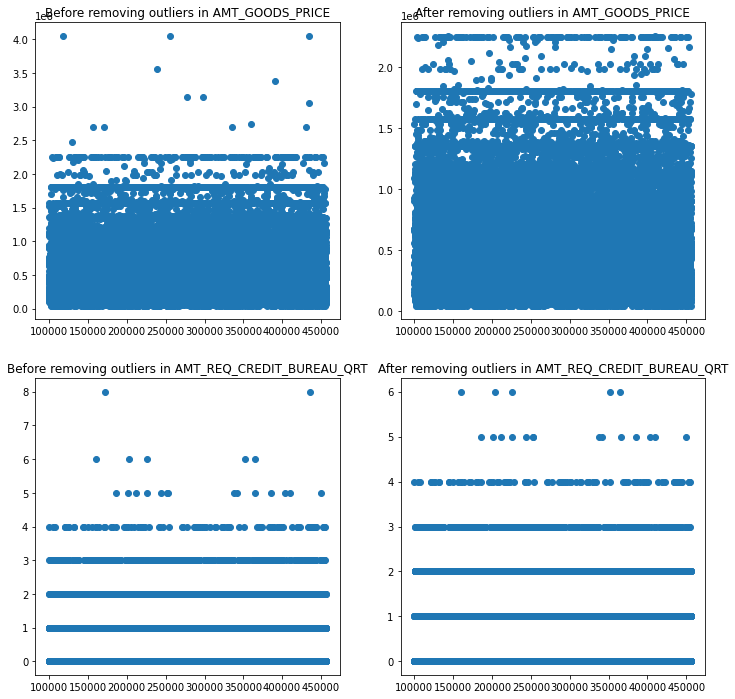

In [54]:
fig=plt.figure(figsize=(12,12))
ax1=fig.add_subplot(2,2,1)
ax2=fig.add_subplot(2,2,2)
ax3=fig.add_subplot(2,2,3)
ax4=fig.add_subplot(2,2,4)
ax1.set(title='Before removing outliers in AMT_GOODS_PRICE')
ax1.scatter(df['SK_ID_CURR'],df['AMT_GOODS_PRICE'] )
ax2.set(title='After removing outliers in AMT_GOODS_PRICE')
ax2.scatter(df1['SK_ID_CURR'],df1['AMT_GOODS_PRICE'] )
ax3.set(title='Before removing outliers in AMT_REQ_CREDIT_BUREAU_QRT')
ax3.scatter(df['SK_ID_CURR'],df['AMT_REQ_CREDIT_BUREAU_QRT'] )
ax4.set(title='After removing outliers in AMT_REQ_CREDIT_BUREAU_QRT')
ax4.scatter(df1['SK_ID_CURR'],df1['AMT_REQ_CREDIT_BUREAU_QRT'] )
plt.show()

### Creating Bins on columns having continious data

#### Binning DAYS_BIRTH into 10 bins

In [55]:
#converting DAYS_BIRTH into years and making it into a positive number
df1['DAYS_BIRTH']=(df1['DAYS_BIRTH']/365)*-1
#Binning DAYS_BIRTH into 10 bins staring from 10 to 100
df1['Days_birth_binned']=pd.cut((df1['DAYS_BIRTH']), bins=[0,10,20,30,40,50,60,70,80,90,100],labels=[10,20,30,40,50,60,70,80,90,100])
#counting the values in each bins
df1['Days_birth_binned'].value_counts()
# we find some empty bins having zero records, lets igonre it for now

40     14267
50     13354
60     11982
30      7273
70      6248
100        0
90         0
80         0
20         0
10         0
Name: Days_birth_binned, dtype: int64

#### Binning AMT_INCOME_TOTAL into four categories based on percencitle values

In [56]:
df1['income_bins']=pd.qcut(df1['AMT_INCOME_TOTAL'],4,labels=['Iow_income','Iow_medium_income','high_medium_income','upper_income'])
df1['income_bins'].value_counts()

Iow_income            16672
Iow_medium_income     14233
upper_income          12729
high_medium_income     9490
Name: income_bins, dtype: int64

In [57]:
df1[['AMT_INCOME_TOTAL','income_bins']].head(20)

,AMT_INCOME_TOTAL,income_bins
7,360000.0,upper_income
10,112500.0,Iow_income
15,157500.0,Iow_medium_income
16,108000.0,Iow_income
18,112500.0,Iow_income
21,202500.0,high_medium_income
22,450000.0,upper_income
35,112500.0,Iow_income
36,198000.0,high_medium_income
38,99000.0,Iow_income


In [58]:
#AMT_INCOME_TOTAL              float64
#AMT_CREDIT                    float64
#AMT_ANNUITY                   float64
#AMT_GOODS_PRICE

In [59]:
df1['credit_amount_bins']=pd.qcut(df1['AMT_CREDIT'],4,labels=['Iow_credit','Iow_medium_credit','high_medium_credit','upper_credit'])
df1['credit_amount_bins'].value_counts()

Iow_medium_credit     13489
Iow_credit            13282
upper_credit          13188
high_medium_credit    13165
Name: credit_amount_bins, dtype: int64

In [60]:
df1[['credit_amount_bins','AMT_CREDIT']].head(10)

,credit_amount_bins,AMT_CREDIT
7,upper_credit,1530000.0
10,high_medium_credit,652500.0
15,Iow_medium_credit,299772.0
16,Iow_medium_credit,509602.5
18,Iow_credit,157500.0
21,upper_credit,1132573.5
22,Iow_medium_credit,497520.0
35,Iow_medium_credit,450000.0
36,high_medium_credit,641173.5
38,Iow_credit,247275.0


In [61]:
df1['credit_amount_bins']=pd.qcut(df1['AMT_CREDIT'],4,labels=['Iow_credit','Iow_medium_credit','high_medium_credit','upper_credit'])
df1['credit_amount_bins'].value_counts()

Iow_medium_credit     13489
Iow_credit            13282
upper_credit          13188
high_medium_credit    13165
Name: credit_amount_bins, dtype: int64

In [62]:
df1['annuity_amount_bins']=pd.qcut(df1['AMT_ANNUITY'],4,labels=['Iow_annuity','Iow_medium_annuity','high_medium_annuity','upper_annuity'])
df1['annuity_amount_bins'].value_counts()

high_medium_annuity    13299
Iow_medium_annuity     13281
Iow_annuity            13281
upper_annuity          13263
Name: annuity_amount_bins, dtype: int64

In [63]:
df1[['AMT_ANNUITY','annuity_amount_bins']].head(20)

,AMT_ANNUITY,annuity_amount_bins
7,42075.0,upper_annuity
10,21177.0,Iow_medium_annuity
15,20160.0,Iow_medium_annuity
16,26149.5,high_medium_annuity
18,7875.0,Iow_annuity
21,37561.5,upper_annuity
22,32521.5,high_medium_annuity
35,44509.5,upper_annuity
36,23157.0,Iow_medium_annuity
38,17338.5,Iow_medium_annuity


In [64]:
df1['goods_amount_bins']=pd.qcut(df1['AMT_GOODS_PRICE'],4,labels=['Iow_goods_amount','Iow_medium_goods_amount','high_medium_goods_amount','upper_goods_amount'])
df1['goods_amount_bins'].value_counts()

Iow_goods_amount            13407
high_medium_goods_amount    13369
Iow_medium_goods_amount     13337
upper_goods_amount          13011
Name: goods_amount_bins, dtype: int64

In [65]:
df1[['AMT_GOODS_PRICE','goods_amount_bins']].head(20)

,AMT_GOODS_PRICE,goods_amount_bins
7,1530000.0,upper_goods_amount
10,652500.0,high_medium_goods_amount
15,247500.0,Iow_medium_goods_amount
16,387000.0,Iow_medium_goods_amount
18,157500.0,Iow_goods_amount
21,927000.0,upper_goods_amount
22,450000.0,Iow_medium_goods_amount
35,450000.0,Iow_medium_goods_amount
36,553500.0,high_medium_goods_amount
38,225000.0,Iow_goods_amount


In [66]:
df1.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_HOUSING_TYPE,DAYS_BIRTH,FLAG_MOBIL,FLAG_CONT_MOBILE,FLAG_EMAIL,REGION_RATING_CLIENT,REG_CITY_NOT_LIVE_CITY,ORGANIZATION_TYPE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,AMT_REQ_CREDIT_BUREAU_QRT,Days_birth_binned,income_bins,credit_amount_bins,annuity_amount_bins,goods_amount_bins
7,100010,0,Cash loans,Y,Y,360000.0,1530000.0,42075.0,1530000.0,State servant,House / apartment,51.643836,1,1,0,3,0,Other,1,0,0,0,0,0.0,60,upper_income,upper_credit,upper_annuity,upper_goods_amount
10,100014,0,Cash loans,N,Y,112500.0,652500.0,21177.0,652500.0,Working,House / apartment,27.936986,1,1,0,2,0,Medicine,1,0,0,0,0,0.0,30,Iow_income,high_medium_credit,Iow_medium_annuity,high_medium_goods_amount
15,100019,0,Cash loans,Y,Y,157500.0,299772.0,20160.0,247500.0,Working,Rented apartment,23.912329,1,1,0,3,1,Business Entity Type 2,0,0,0,0,0,0.0,30,Iow_medium_income,Iow_medium_credit,Iow_medium_annuity,Iow_medium_goods_amount
16,100020,0,Cash loans,N,N,108000.0,509602.5,26149.5,387000.0,Working,House / apartment,35.427397,1,1,0,2,1,Government,1,0,0,0,0,1.0,40,Iow_income,Iow_medium_credit,high_medium_annuity,Iow_medium_goods_amount
18,100022,0,Revolving loans,N,Y,112500.0,157500.0,7875.0,157500.0,Working,House / apartment,48.542466,1,1,0,1,0,Housing,1,0,0,0,0,0.0,50,Iow_income,Iow_credit,Iow_annuity,Iow_goods_amount


In [67]:
df1.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH', 'FLAG_MOBIL', 'FLAG_CONT_MOBILE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT', 'REG_CITY_NOT_LIVE_CITY', 'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'AMT_REQ_CREDIT_BUREAU_QRT', 'Days_birth_binned', 'income_bins', 'credit_amount_bins', 'annuity_amount_bins', 'goods_amount_bins'], dtype='object')

### Imbalance analysis

In [68]:
#rows_unpaid = df_unpaid

In [69]:
x = df1['TARGET']
unique, counts =np.unique(x, return_counts=True)
print(unique)
print(counts)

[0 1]
[48966  4158]


In [70]:
# To find the imbalance percentage, we use the formula (number of rows of target value 1/number of rows of target value0)*100

In [71]:
print("Imbalance percentage = "+ (str(round(100*(counts[1]/counts[0]),3))))

Imbalance percentage = 8.492


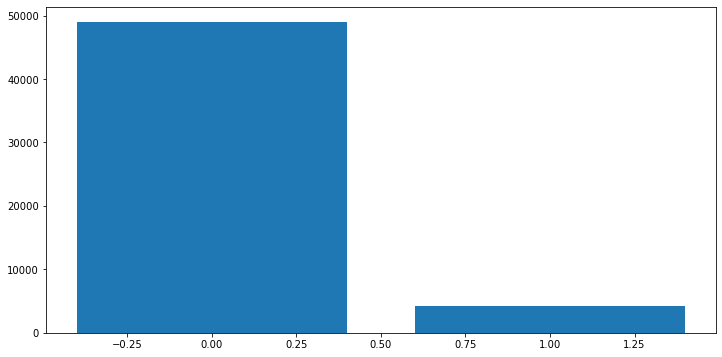

In [72]:
x = df1['TARGET']
unique, counts =np.unique(x, return_counts=True)
plt.figure(figsize=(12, 6))
plt.bar(unique,counts)
plt.xlabel=('y')
plt.show()

### Creating new DataFrames based on the TARGET column values

In [73]:
# client with payment difficulities 
df_unpaid=df1[df1['TARGET']==1]
df_unpaid.shape

(4158, 29)

In [74]:
# client able to repay the loan
df_paid=df1[df1['TARGET']==0]
df_paid.shape

(48966, 29)

In [75]:
# Perfrom Sanaity test

In [76]:
df_unpaid.head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_HOUSING_TYPE,DAYS_BIRTH,FLAG_MOBIL,FLAG_CONT_MOBILE,FLAG_EMAIL,REGION_RATING_CLIENT,REG_CITY_NOT_LIVE_CITY,ORGANIZATION_TYPE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,AMT_REQ_CREDIT_BUREAU_QRT,Days_birth_binned,income_bins,credit_amount_bins,annuity_amount_bins,goods_amount_bins
138,100160,1,Cash loans,N,Y,292500.0,675000.0,36747.0,675000.0,Working,House / apartment,45.663014,1,1,0,2,1,Business Entity Type 3,0,0,0,0,0,0.0,50,upper_income,high_medium_credit,upper_annuity,high_medium_goods_amount
163,100192,1,Cash loans,N,N,111915.0,225000.0,21037.5,225000.0,Commercial associate,With parents,21.887671,1,1,0,2,0,Trade: type 3,0,0,0,0,0,0.0,30,Iow_income,Iow_credit,Iow_medium_annuity,Iow_goods_amount


In [77]:
df_paid.head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_HOUSING_TYPE,DAYS_BIRTH,FLAG_MOBIL,FLAG_CONT_MOBILE,FLAG_EMAIL,REGION_RATING_CLIENT,REG_CITY_NOT_LIVE_CITY,ORGANIZATION_TYPE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,AMT_REQ_CREDIT_BUREAU_QRT,Days_birth_binned,income_bins,credit_amount_bins,annuity_amount_bins,goods_amount_bins
7,100010,0,Cash loans,Y,Y,360000.0,1530000.0,42075.0,1530000.0,State servant,House / apartment,51.643836,1,1,0,3,0,Other,1,0,0,0,0,0.0,60,upper_income,upper_credit,upper_annuity,upper_goods_amount
10,100014,0,Cash loans,N,Y,112500.0,652500.0,21177.0,652500.0,Working,House / apartment,27.936986,1,1,0,2,0,Medicine,1,0,0,0,0,0.0,30,Iow_income,high_medium_credit,Iow_medium_annuity,high_medium_goods_amount


In [78]:
df_paid.describe()

,SK_ID_CURR,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,AMT_REQ_CREDIT_BUREAU_QRT
count,48966.000000,4.896600e+04,4.896600e+04,48966.000000,4.896600e+04,48966.000000,48966.000000
mean,278254.502512,1.701828e+05,6.129198e+05,27276.671793,5.517054e+05,44.463906,0.268309
std,102877.138314,9.273425e+04,4.088472e+05,14290.145869,3.760314e+05,11.849323,0.608409
min,100010.000000,2.655000e+04,4.500000e+04,2052.000000,4.500000e+04,21.049315,0.000000
25%,189158.250000,1.125000e+05,2.725200e+05,16573.500000,2.385000e+05,34.745205,0.000000
50%,278300.000000,1.575000e+05,5.212800e+05,25087.500000,4.545000e+05,43.715068,0.000000
75%,367375.750000,2.025000e+05,8.248230e+05,35068.500000,6.975000e+05,54.386301,0.000000
max,456240.000000,1.440000e+06,2.576898e+06,137182.500000,2.254500e+06,69.041096,6.000000


In [79]:
df_unpaid.describe()

,SK_ID_CURR,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,AMT_REQ_CREDIT_BUREAU_QRT
count,4158.000000,4158.000000,4.158000e+03,4158.000000,4.158000e+03,4158.000000,4158.000000
mean,277981.457191,163694.918831,5.630870e+05,26528.645022,4.941588e+05,40.988053,0.253487
std,103200.832658,80819.467412,3.433673e+05,12192.058115,3.092123e+05,11.377322,0.628262
min,100160.000000,29250.000000,4.500000e+04,3172.500000,4.500000e+04,21.106849,0.000000
25%,188602.250000,112500.000000,2.888730e+05,17905.500000,2.475000e+05,31.499315,0.000000
50%,276353.000000,148500.000000,5.030865e+05,25330.500000,4.500000e+05,39.568493,0.000000
75%,369742.750000,202500.000000,7.551900e+05,32827.500000,6.750000e+05,49.242466,0.000000
max,456215.000000,900000.000000,2.575125e+06,112909.500000,2.223000e+06,68.791781,6.000000


In [80]:
df_paid.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH', 'FLAG_MOBIL', 'FLAG_CONT_MOBILE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT', 'REG_CITY_NOT_LIVE_CITY', 'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'AMT_REQ_CREDIT_BUREAU_QRT', 'Days_birth_binned', 'income_bins', 'credit_amount_bins', 'annuity_amount_bins', 'goods_amount_bins'], dtype='object')

In [81]:
df_paid.dtypes

SK_ID_CURR                      int64
TARGET                       category
NAME_CONTRACT_TYPE           category
FLAG_OWN_CAR                 category
FLAG_OWN_REALTY              category
AMT_INCOME_TOTAL              float64
AMT_CREDIT                    float64
AMT_ANNUITY                   float64
AMT_GOODS_PRICE               float64
NAME_INCOME_TYPE             category
NAME_HOUSING_TYPE            category
DAYS_BIRTH                    float64
FLAG_MOBIL                   category
FLAG_CONT_MOBILE             category
FLAG_EMAIL                   category
REGION_RATING_CLIENT         category
REG_CITY_NOT_LIVE_CITY       category
ORGANIZATION_TYPE            category
FLAG_DOCUMENT_3              category
FLAG_DOCUMENT_4              category
FLAG_DOCUMENT_5              category
FLAG_DOCUMENT_6              category
FLAG_DOCUMENT_7              category
AMT_REQ_CREDIT_BUREAU_QRT     float64
Days_birth_binned            category
income_bins                  category
credit_amoun

In [82]:
# Perfrom univariate Analysis for categorical variables for both the dataframes (Target value 0 and 1)
# Compare the target variable across categories of categorical variables.

Client who owns a car most likely to repay the loan in time compared to a client who does not own a car but the difference is very narrow


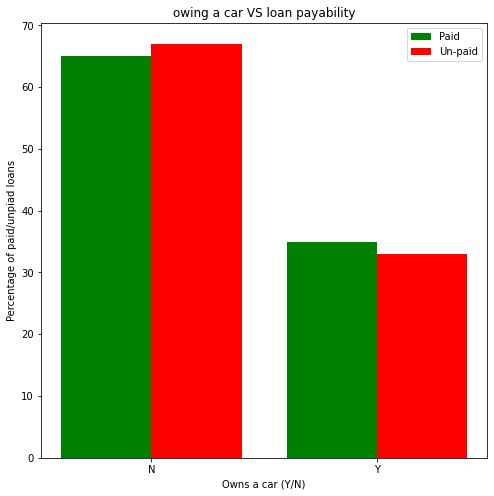

In [83]:
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(111)
ax.set(title='owing a car VS loan payability',xlabel='Owns a car (Y/N)',ylabel='Percentage of paid/unpiad loans')
x1=[0.8,1.8]
x2=[1.2,2,2]
x0_car = df_paid['FLAG_OWN_CAR']
x1_car = df_unpaid['FLAG_OWN_CAR']
unique_0,counts_0 = np.unique(x0_car,return_counts=True)
unique_1,counts_1 = np.unique(x1_car,return_counts=True)
a= sum(counts_0)
ax.bar(unique_0,counts_0/a*100,color='green',label='Paid',width=-0.4,align='edge')
b= sum(counts_1)
ax.bar(unique_1,counts_1/b*100,color='Red',label='Un-paid',width=0.4,align='edge')
ax.legend()
print('Client who owns a car most likely to repay the loan in time compared to a client who does not own a car but the difference is very narrow')
plt.show()

Person who own a house most likely to repay the loan in time compared to a person who does not own a house but the difference is very narrow


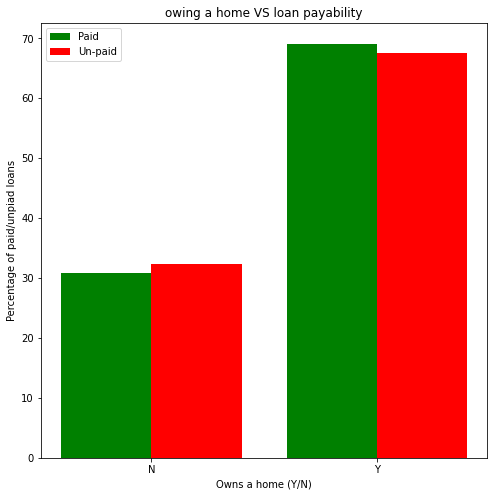

In [84]:
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(111)
ax.set(title='owing a home VS loan payability',xlabel='Owns a home (Y/N)',ylabel='Percentage of paid/unpiad loans')
x1=[0.8,1.8]
x2=[1.2,2,2]
x0_realty = df_paid['FLAG_OWN_REALTY']
x1_realty = df_unpaid['FLAG_OWN_REALTY']
unique_0,counts_0 = np.unique(x0_realty,return_counts=True)
unique_1,counts_1 = np.unique(x1_realty,return_counts=True)
a= sum(counts_0)
ax.bar(unique_0,counts_0/a*100,color='green',label='Paid',width=-0.4,align='edge')
b= sum(counts_1)
ax.bar(unique_1,counts_1/b*100,color='Red',label='Un-paid',width=0.4,align='edge')
ax.legend()
print('Person who own a house most likely to repay the loan in time compared to a person who does not own a house but the difference is very narrow')
plt.show()

Client who take the revolving loan is most likely to repay the loan in time compared to the client who take cash loan but the difference is very narrow


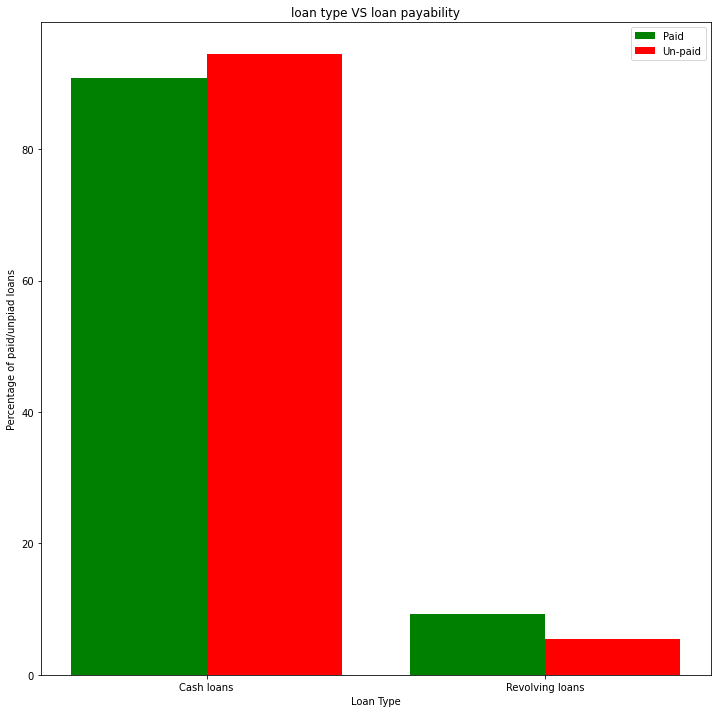

In [85]:
fig=plt.figure(figsize=(12,12))
ax=fig.add_subplot(111)
ax.set(title='loan type VS loan payability',xlabel='Loan Type',ylabel='Percentage of paid/unpiad loans')
x1=[0.8,1.8]
x2=[1.2,2,2]
x0_cont = df_paid['NAME_CONTRACT_TYPE']
x1_cont = df_unpaid['NAME_CONTRACT_TYPE']
unique_0,counts_0 = np.unique(x0_cont,return_counts=True)
unique_1,counts_1 = np.unique(x1_cont,return_counts=True)
a= sum(counts_0)
ax.bar(unique_0,counts_0/a*100,color='green',label='Paid',width=-0.4,align='edge')
b= sum(counts_1)
ax.bar(unique_1,counts_1/b*100,color='Red',label='Un-paid',width=0.4,align='edge')
ax.legend()
print('Client who take the revolving loan is most likely to repay the loan in time compared to the client who take cash loan but the difference is very narrow')
plt.show()


1. Person who belongs to working class is not likely to repay the loan in time
2. Students, Business man and unemployed are not applying for loan, ther percentage is nearly negligible
3. Percentage of loan applied by state servant is less but they are likey to pay the loan in time
4. Commercial associate and pensionar have applied for loan in a good percenetage but less than the working class. They are likey to the loan in time.


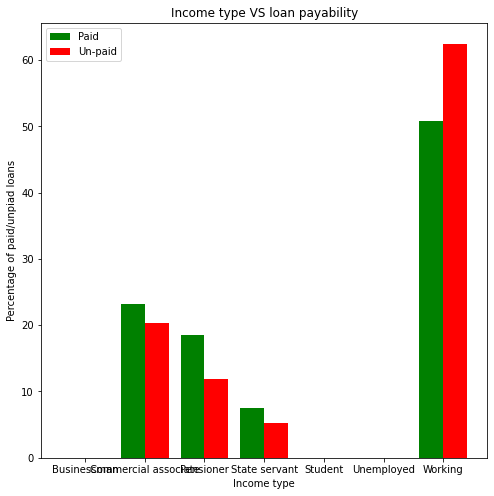

In [86]:
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(111)
ax.set(title='Income type VS loan payability',xlabel='Income type',ylabel='Percentage of paid/unpiad loans')
x1=[0.8,1.8]
x2=[1.2,2,2]
x0_inc_type = df_paid['NAME_INCOME_TYPE']
x1_inc_type = df_unpaid['NAME_INCOME_TYPE']
unique_0,counts_0 = np.unique(x0_inc_type,return_counts=True)
unique_1,counts_1 = np.unique(x1_inc_type,return_counts=True)
a= sum(counts_0)
ax.bar(unique_0,counts_0/a*100,color='green',label='Paid',width=-0.4,align='edge')
b= sum(counts_1)
ax.bar(unique_1,counts_1/b*100,color='Red',label='Un-paid',width=0.4,align='edge')
ax.legend()
print('1. Person who belongs to working class is not likely to repay the loan in time')
print('2. Students, Business man and unemployed are not applying for loan, ther percentage is nearly negligible')
print('3. Percentage of loan applied by state servant is less but they are likey to pay the loan in time')
print('4. Commercial associate and pensionar have applied for loan in a good percenetage but less than the working class. They are likey to the loan in time.')
plt.show()

1. There is a huge percentage of clients who applied for the loan are belongs to house or appartment. Clients are likely to pay the loan as well as unlikely to the pay the loan, the difference is very much narrow.
2. Clients living in co-appartment are not likely applying for loan, their percentage is nearly negligible
3. Percentage of loan applied by the clients living in rented appartment and office appratment is low. They are likey to pay the loan and as well as unlikey, The difference is narrow.
4. Clients living with parents are not likely to pay the loan back. 


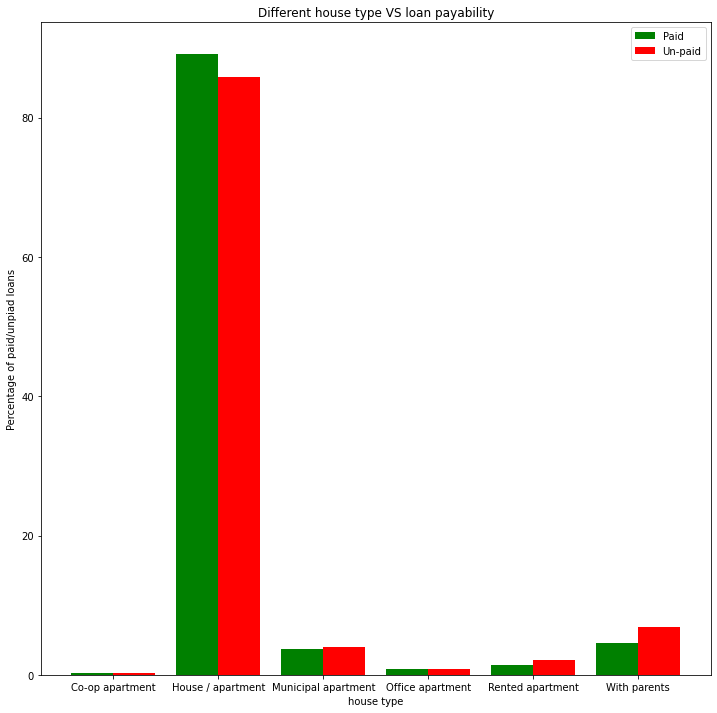

In [87]:
fig=plt.figure(figsize=(12,12))
ax=fig.add_subplot(111)
ax.set(title='Different house type VS loan payability',xlabel='house type',ylabel='Percentage of paid/unpiad loans')
x1=[0.8,1.8]
x2=[1.2,2,2]
x0_home_type = df_paid['NAME_HOUSING_TYPE']
x1_home_type = df_unpaid['NAME_HOUSING_TYPE']
unique_0,counts_0 = np.unique(x0_home_type,return_counts=True)
unique_1,counts_1 = np.unique(x1_home_type,return_counts=True)
a= sum(counts_0)
ax.bar(unique_0,counts_0/a*100,color='green',label='Paid',width=-0.4,align='edge')
b= sum(counts_1)
ax.bar(unique_1,counts_1/b*100,color='Red',label='Un-paid',width=0.4,align='edge')
ax.legend()
print('1. There is a huge percentage of clients who applied for the loan are belongs to house or appartment. Clients are likely to pay the loan as well as unlikely to the pay the loan, the difference is very much narrow.')
print('2. Clients living in co-appartment are not likely applying for loan, their percentage is nearly negligible')
print('3. Percentage of loan applied by the clients living in rented appartment and office appratment is low. They are likey to pay the loan and as well as unlikey, The difference is narrow.')
print('4. Clients living with parents are not likely to pay the loan back. ')
plt.show()

1. There is huge percentage of region rating "2" means, most of the clients belong to the region whose rating is 2 according to bank.
2. Clients belongs to region are likey to pay the loan back in time
3. Clients belongs to region with rating 1 are likely to pay the loan in time
4. Clients belongs to region with rating 1 are likely to pay the loan in time


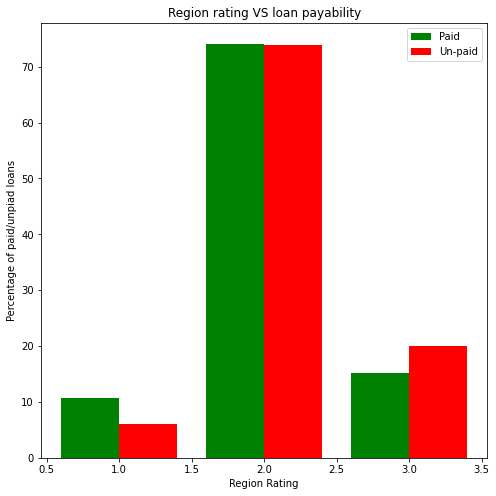

In [88]:
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(111)
ax.set(title='Region rating VS loan payability',xlabel='Region Rating',ylabel='Percentage of paid/unpiad loans')
x1=[0.8,1.8]
x2=[1.2,2,2]
x0_region = df_paid['REGION_RATING_CLIENT']
x1_region = df_unpaid['REGION_RATING_CLIENT']
unique_0,counts_0 = np.unique(x0_region,return_counts=True)
unique_1,counts_1 = np.unique(x1_region,return_counts=True)
a= sum(counts_0)
ax.bar(unique_0,counts_0/a*100,color='green',label='Paid',width=-0.4,align='edge')
b= sum(counts_1)
ax.bar(unique_1,counts_1/b*100,color='Red',label='Un-paid',width=0.4,align='edge')
ax.legend()
print('1. There is huge percentage of region rating "2" means, most of the clients belong to the region whose rating is 2 according to bank.')
print('2. Clients belongs to region are likey to pay the loan back in time')
print('3. Clients belongs to region with rating 1 are likely to pay the loan in time')
print('4. Clients belongs to region with rating 1 are likely to pay the loan in time')
plt.show()


1. Clients whose region city is different from live city are not likey to re-pay the loan back 
2. Clients whose region city is same as live city are likely to re-pay the loan amount back but the difference of clients likely to pay and not liekly to is narrow


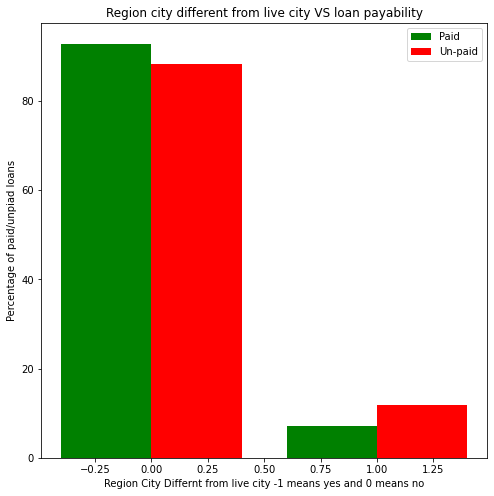

In [89]:
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(111)
ax.set(title='Region city different from live city VS loan payability',xlabel='Region City Differnt from live city -1 means yes and 0 means no',ylabel='Percentage of paid/unpiad loans')
x1=[0.8,1.8]
x2=[1.2,2,2]
x0_NLC = df_paid['REG_CITY_NOT_LIVE_CITY']
x1_NLC = df_unpaid['REG_CITY_NOT_LIVE_CITY']
unique_0,counts_0 = np.unique(x0_NLC,return_counts=True)
unique_1,counts_1 = np.unique(x1_NLC,return_counts=True)
a= sum(counts_0)
ax.bar(unique_0,counts_0/a*100,color='green',label='Paid',width=-0.4,align='edge')
b= sum(counts_1)
ax.bar(unique_1,counts_1/b*100,color='Red',label='Un-paid',width=0.4,align='edge')
ax.legend()
print('1. Clients whose region city is different from live city are not likey to re-pay the loan back ')
print('2. Clients whose region city is same as live city are likely to re-pay the loan amount back but the difference of clients likely to pay and not liekly to is narrow')
plt.show()

1. Clients whose document 3 is not available are likely to the pay the loan in time
2. Percentage of clients with availabe document 3 are higher than the unavilability


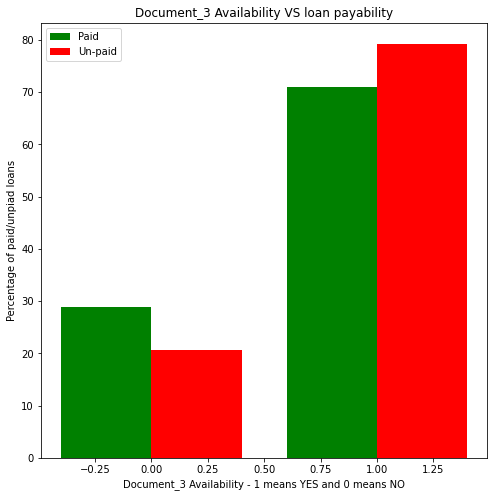

In [90]:
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(111)
ax.set(title='Document_3 Availability VS loan payability',xlabel='Document_3 Availability - 1 means YES and 0 means NO',ylabel='Percentage of paid/unpiad loans')
x1=[0.8,1.8]
x2=[1.2,2,2]
x0_doc3 = df_paid['FLAG_DOCUMENT_3']
x1_doc3 = df_unpaid['FLAG_DOCUMENT_3']
unique_0,counts_0 = np.unique(x0_doc3,return_counts=True)
unique_1,counts_1 = np.unique(x1_doc3,return_counts=True)
a= sum(counts_0)
ax.bar(unique_0,counts_0/a*100,color='green',label='Paid',width=-0.4,align='edge')
b= sum(counts_1)
ax.bar(unique_1,counts_1/b*100,color='Red',label='Un-paid',width=0.4,align='edge')
ax.legend()
print('1. Clients whose document 3 is not available are likely to the pay the loan in time')
print('2. Percentage of clients with availabe document 3 are higher than the unavilability')
plt.show()

1. Percentage of clients with document 6 is very low
2. Clients with document 6 are likey to pay the loan back


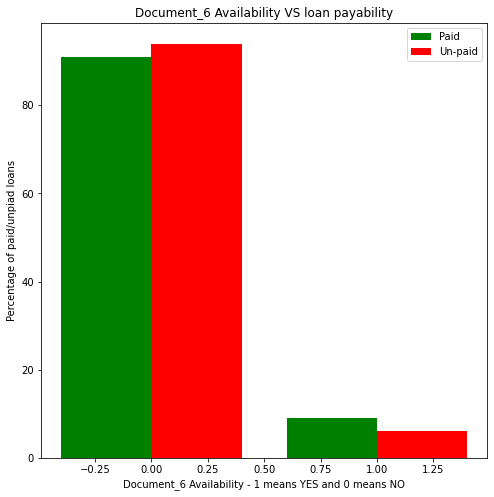

In [91]:
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(111)
ax.set(title='Document_6 Availability VS loan payability',xlabel='Document_6 Availability - 1 means YES and 0 means NO',ylabel='Percentage of paid/unpiad loans')
x1=[0.8,1.8]
x2=[1.2,2,2]
x0_doc6 = df_paid['FLAG_DOCUMENT_6']
x1_doc6 = df_unpaid['FLAG_DOCUMENT_6']
unique_0,counts_0 = np.unique(x0_doc6,return_counts=True)
unique_1,counts_1 = np.unique(x1_doc6,return_counts=True)
a= sum(counts_0)
ax.bar(unique_0,counts_0/a*100,color='green',label='Paid',width=-0.4,align='edge')
b= sum(counts_1)
ax.bar(unique_1,counts_1/b*100,color='Red',label='Un-paid',width=0.4,align='edge')
ax.legend()
print('1. Percentage of clients with document 6 is very low')
print('2. Clients with document 6 are likey to pay the loan back')

plt.show()

# Analysing Continous Data

People with medium incomes are more likely unpay the credits
Amoung all the category people with high income pays credits on time


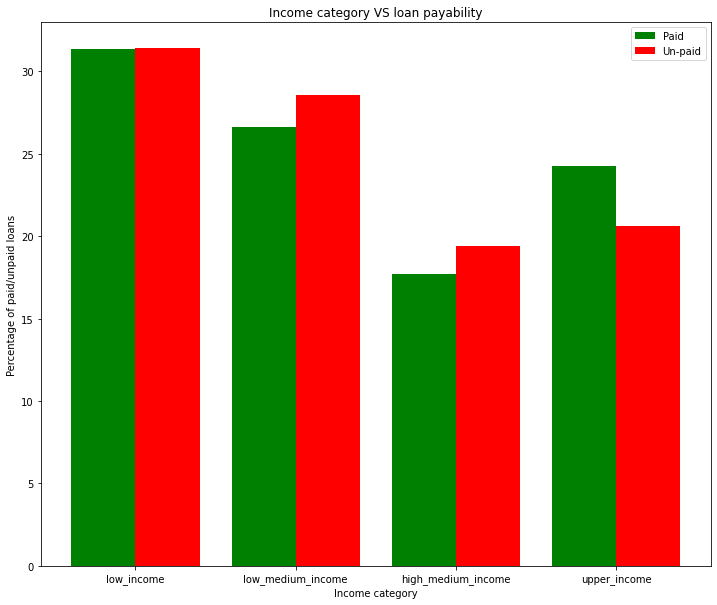

In [92]:
fig=plt.figure(figsize=(12,10))
ax=fig.add_subplot(111)
ax.set(title='Income category VS loan payability',xlabel='Income category',ylabel='Percentage of paid/unpaid loans')
x0 = df_paid['income_bins']
x1 = df_unpaid['income_bins']
unique_0,counts_0 = np.unique(x0,return_counts=True)
unique_1,counts_1 = np.unique(x1,return_counts=True)
a= sum(counts_0)
ax.bar(unique_0,counts_0/a*100,color='green',label='Paid',width=-0.4,align='edge')
b= sum(counts_1)
ax.bar(unique_1,counts_1/b*100,color='Red',label='Un-paid',width=0.4,align='edge')
ax.legend()
print('People with medium incomes are more likely unpay the credits')
print('Amoung all the category people with high income pays credits on time')
plt.show()

People with high credit amounts are most likely to pay the credit,as well as low credit amounts most likely paid
Among all the categories, low medium credits are most likely unpay


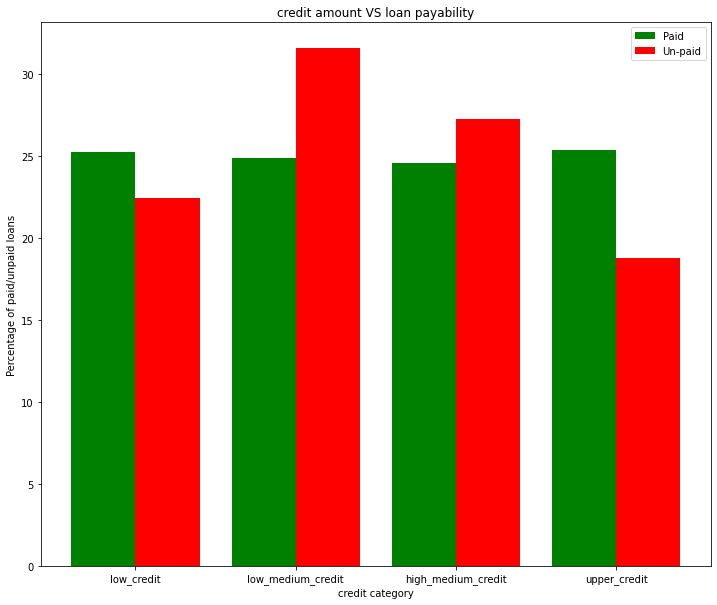

In [93]:
fig=plt.figure(figsize=(12,10))
ax=fig.add_subplot(111)
ax.set(title='credit amount VS loan payability',xlabel='credit category',ylabel='Percentage of paid/unpaid loans')
x0 = df_paid['credit_amount_bins']
x1 = df_unpaid['credit_amount_bins']
unique_0,counts_0 = np.unique(x0,return_counts=True)
unique_1,counts_1 = np.unique(x1,return_counts=True)
a= sum(counts_0)
ax.bar(unique_0,counts_0/a*100,color='green',label='Paid',width=-0.4,align='edge')
b= sum(counts_1)
ax.bar(unique_1,counts_1/b*100,color='Red',label='Un-paid',width=0.4,align='edge')
ax.legend()
print('People with high credit amounts are most likely to pay the credit,as well as low credit amounts most likely paid')
print('Among all the categories, low medium credits are most likely unpay')
plt.show()

People with medium annuity amounts are more likely unpay the credits
People with low as well as high annuity amounts pays the credit


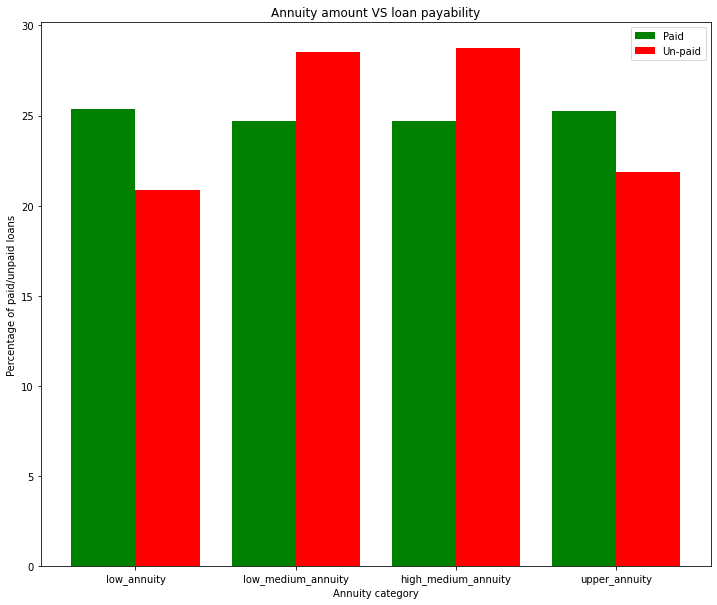

In [94]:
fig=plt.figure(figsize=(12,10))
ax=fig.add_subplot(111)
ax.set(title='Annuity amount VS loan payability',xlabel='Annuity category',ylabel='Percentage of paid/unpaid loans')
x0 = df_paid['annuity_amount_bins']
x1 = df_unpaid['annuity_amount_bins']
unique_0,counts_0 = np.unique(x0,return_counts=True)
unique_1,counts_1 = np.unique(x1,return_counts=True)
a= sum(counts_0)
ax.bar(unique_0,counts_0/a*100,color='green',label='Paid',width=-0.4,align='edge')
b= sum(counts_1)
ax.bar(unique_1,counts_1/b*100,color='Red',label='Un-paid',width=0.4,align='edge')
ax.legend()
print('People with medium annuity amounts are more likely unpay the credits')
print('People with low as well as high annuity amounts pays the credit')
plt.show()

People with low medium goods amounts  are mostly likely unpay the credits,while rest pays the credits
People with high goods amounts have very least percetage of defaulters,and they are most likely to pay credits amoungst all categories


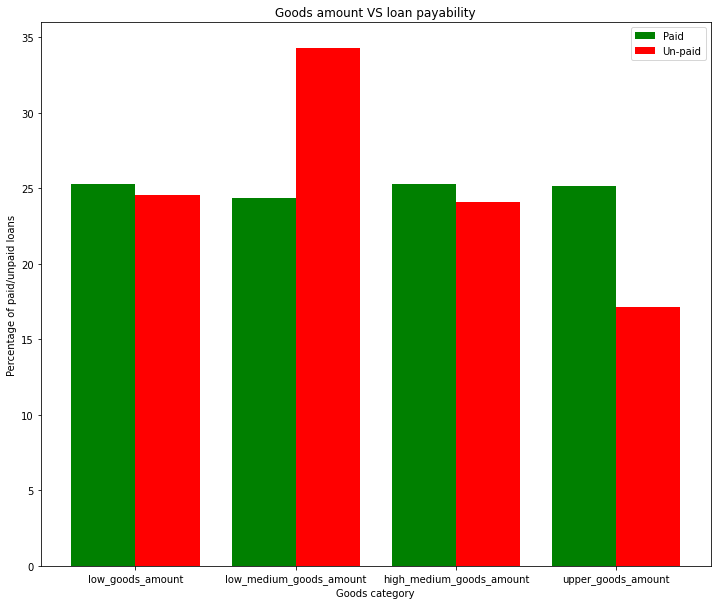

In [95]:
fig=plt.figure(figsize=(12,10))
ax=fig.add_subplot(111)
ax.set(title='Goods amount VS loan payability',xlabel='Goods category',ylabel='Percentage of paid/unpaid loans')
x0 = df_paid['goods_amount_bins']
x1 = df_unpaid['goods_amount_bins']
unique_0,counts_0 = np.unique(x0,return_counts=True)
unique_1,counts_1 = np.unique(x1,return_counts=True)
a= sum(counts_0)
ax.bar(unique_0,counts_0/a*100,color='green',label='Paid',width=-0.4,align='edge')
b=sum(counts_1)
ax.bar(unique_1,counts_1/b*100,color='Red',label='Un-paid',width=0.4,align='edge')
ax.legend()
print('People with low medium goods amounts  are mostly likely unpay the credits,while rest pays the credits')
print('People with high goods amounts have very least percetage of defaulters,and they are most likely to pay credits amoungst all categories')
plt.show()

People whos age is between 20-40 years are most unlikely to pay credits
People whos age is between 50-70 years are most unlikely to pay credits


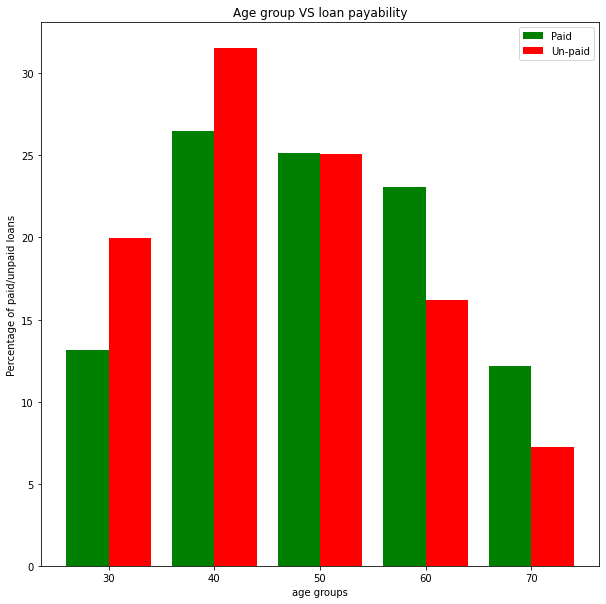

In [96]:
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111)
ax.set(title='Age group VS loan payability',xlabel='age groups',ylabel='Percentage of paid/unpaid loans')
x0 = df_paid['Days_birth_binned']
x1 = df_unpaid['Days_birth_binned']
unique_0,counts_0 = np.unique(x0,return_counts=True)
unique_1,counts_1 = np.unique(x1,return_counts=True)
a= sum(counts_0)
ax.bar(unique_0,counts_0/a*100,color='green',label='Paid',width=-4.0,align='edge')
b= sum(counts_1)
ax.bar(unique_1,counts_1/b*100,color='Red',label='Un-paid',width=4.0,align='edge')
ax.legend()
print('People whos age is between 20-40 years are most unlikely to pay credits')
print('People whos age is between 50-70 years are most unlikely to pay credits')
plt.show()

People who has credit rank as 1 are most likely to pay credits,which decreases as credit rank decreases from 1 to 6


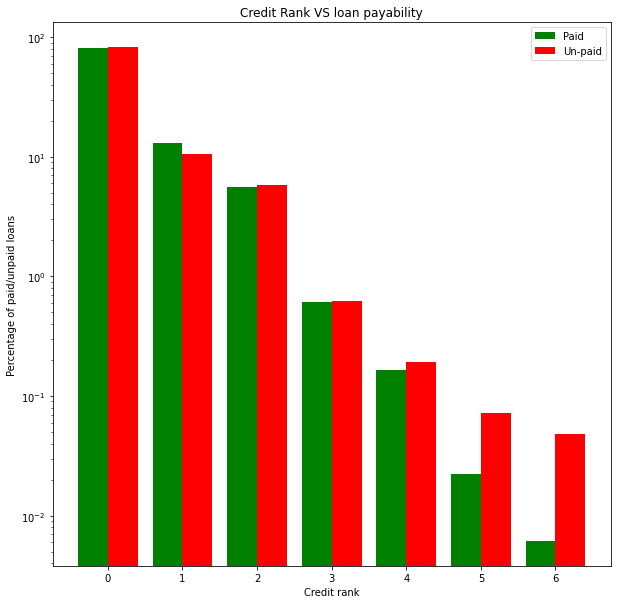

In [97]:
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111)
ax.set(title='Credit Rank VS loan payability',xlabel='Credit rank',ylabel='Percentage of paid/unpaid loans')
x0 = df_paid['AMT_REQ_CREDIT_BUREAU_QRT']
x1 = df_unpaid['AMT_REQ_CREDIT_BUREAU_QRT']
unique_0,counts_0 = np.unique(x0,return_counts=True)
unique_1,counts_1 = np.unique(x1,return_counts=True)
a= sum(counts_0)
ax.bar(unique_0,counts_0/a*100,color='green',label='Paid',width=-.4,align='edge')
b= sum(counts_1)
ax.bar(unique_1,counts_1/b*100,color='Red',label='Un-paid',width=.4,align='edge')
ax.legend()
plt.yscale('log')
print('People who has credit rank as 1 are most likely to pay credits,which decreases as credit rank decreases from 1 to 6')
plt.show()

### Analysing correlation between Numerical columns of df_paid and df_unpaid 

                  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE
AMT_INCOME_TOTAL          1.000000    0.388238     0.466861         0.394111
AMT_CREDIT                0.388238    1.000000     0.774942         0.987075
AMT_ANNUITY               0.466861    0.774942     1.000000         0.779201
AMT_GOODS_PRICE           0.394111    0.987075     0.779201         1.000000


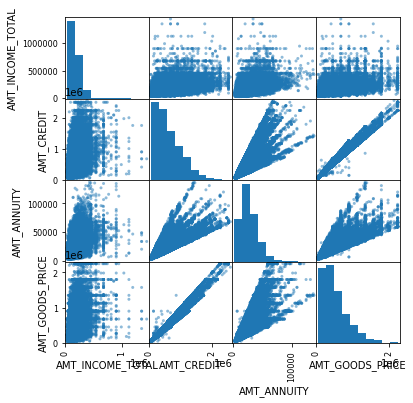

In [100]:
from pandas.plotting import scatter_matrix
s=['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE'] 
# selecting numeric coloumns
df_num_paid=df_paid[s]
df_num_unpaid=df_unpaid[s]
df_num_unpaid.corr()
df_num_paid.corr()
print(df_num_paid.corr()) 
#Creating correlation matrix of numerical columns on both paid and unpaid DataFrames
scatter_matrix(df_num_paid, figsize=(6, 6))
plt.show()

                  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE
AMT_INCOME_TOTAL          1.000000    0.367987     0.449512         0.371240
AMT_CREDIT                0.367987    1.000000     0.747547         0.982703
AMT_ANNUITY               0.449512    0.747547     1.000000         0.749333
AMT_GOODS_PRICE           0.371240    0.982703     0.749333         1.000000


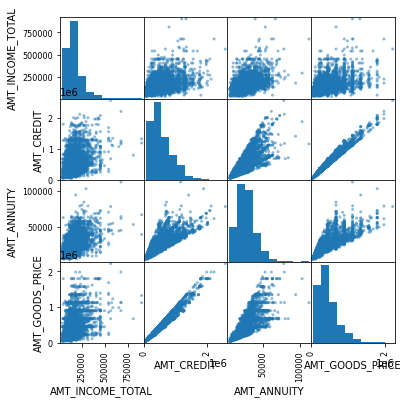

In [102]:
print(df_num_unpaid.corr())
scatter_matrix(df_num_unpaid, figsize=(6, 6))
plt.show()

### From the correlation matrix and the scatter plot we can conclude that there is a positive correlation between 
 1)AMT_CREDIT and AMT_GOODS_PRICE (at 0.98) 
     
 2)AMT_CREDIT and AMT_ANNUITY (at 0.75)
     
 3)AMT_ANNUITY and AMT_GOODS_PRICE  (at 0.75)

# Analysis on previous application data

In [103]:
# import previous application data into dataframe

df_prev = pd.read_csv("G:/Machine-learning/EDA/previous_application.csv")

In [104]:
# routine check on previous application dataframe df_prev

In [105]:
df_prev.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [106]:
# shape of dataframe
df_prev.shape

(1670214, 37)

In [107]:
df_prev.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [108]:
df_prev.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'], dtype='object')

In [109]:
df_prev.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
RATE_DOWN_PAYMENT              float64
RATE_INTEREST_PRIMARY          float64
RATE_INTEREST_PRIVILEGED       float64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE             

In [110]:
# As data set is huge, so firstly we will convert it into train and test dataframe in ratio 80:20 . Perform analysis on test data
np.random.seed(100)
msk_prev = np.random.rand(len(df_prev)) < 0.8
df_prev_train = df_prev[msk_prev]
df_prev_test = df_prev[~msk_prev]

In [111]:
# Routine check on train and test dataframe

df_prev_train.shape

(1336014, 37)

In [112]:
df_prev_test.shape

(334200, 37)

In [113]:
df_prev_train.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.336014e+06,1.336014e+06,1.037744e+06,1.336014e+06,1.336013e+06,6.191300e+05,1.027257e+06,1.336014e+06,1.336014e+06,619130.000000,4708.000000,4708.000000,1.336014e+06,1.336014e+06,1.037749e+06,797039.000000,797039.000000,797039.000000,797039.000000,797039.000000,797039.000000
mean,1.922953e+06,2.783733e+05,1.594702e+04,1.750689e+05,1.958908e+05,6.707302e+03,2.277164e+05,1.248481e+01,9.964529e-01,0.079584,0.188818,0.773860,-8.803423e+02,3.141564e+02,1.605202e+01,342173.149521,13796.451570,33788.457554,76520.333211,81957.610892,0.332785
std,5.326901e+05,1.027903e+05,1.477319e+04,2.926346e+05,3.183317e+05,2.120165e+04,3.152853e+05,3.333257e+00,5.945199e-02,0.107744,0.088633,0.100505,7.789642e+02,7.134119e+03,1.456219e+01,88982.282920,72375.124446,106885.612011,149603.281633,153280.456368,0.471211
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461686e+06,1.893630e+05,6.320835e+03,1.862550e+04,2.407950e+04,0.000000e+00,5.080910e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1627.000000,-1242.000000,-1314.000000,-1269.000000,0.000000
50%,1.922835e+06,2.787110e+05,1.125000e+04,7.096050e+04,8.048700e+04,1.629000e+03,1.123451e+05,1.200000e+01,1.000000e+00,0.051410,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-360.000000,-537.000000,-499.000000,0.000000
75%,2.384199e+06,3.675070e+05,2.064690e+04,1.800000e+05,2.158650e+05,7.735500e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-75.000000,-44.000000,1.000000
max,2.845381e+06,4.562550e+05,4.180581e+05,5.850000e+06,4.509688e+06,3.060045e+06,5.850000e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [114]:
df_prev_test.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,3.342000e+05,334200.00000,260235.000000,3.342000e+05,3.342000e+05,1.552400e+05,2.574420e+05,334200.000000,334200.000000,155240.000000,1243.000000,1243.000000,334200.000000,3.342000e+05,260235.000000,200110.000000,200110.000000,200110.000000,200110.000000,200110.000000,200110.000000
mean,1.923632e+06,278292.65892,15987.430266,1.758934e+05,1.970064e+05,6.657921e+03,2.283697e+05,12.481679,0.996526,0.079847,0.186611,0.772149,-882.028390,3.131304e+02,16.062286,342356.053276,13945.033632,33685.391585,76829.627560,82130.685313,0.331713
std,5.322298e+05,102913.10631,14817.748587,2.933590e+05,3.195426e+05,1.976473e+04,3.158402e+05,3.337114,0.058838,0.108140,0.083940,0.102310,779.640832,7.100706e+03,14.587639,88652.152983,72722.061628,106743.362751,149823.188944,153395.636963,0.470830
min,1.000002e+06,100005.00000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.059121,0.424419,-2922.000000,-1.000000e+00,0.000000,-2919.000000,-2892.000000,-2801.000000,-2867.000000,-2852.000000,0.000000
25%,1.462561e+06,189157.75000,6333.547500,1.897650e+04,2.438888e+04,0.000000e+00,5.094000e+04,10.000000,1.000000,0.000000,0.160716,0.715645,-1302.000000,-1.000000e+00,6.000000,365243.000000,-1632.000000,-1244.000000,-1317.000000,-1271.000000,0.000000
50%,1.924184e+06,278729.00000,11250.000000,7.141500e+04,8.078175e+04,1.661400e+03,1.122660e+05,12.000000,1.000000,0.052293,0.189122,0.835095,-584.000000,3.000000e+00,12.000000,365243.000000,-830.000000,-362.000000,-538.000000,-499.000000,0.000000
75%,2.384632e+06,367566.25000,20737.417500,1.830715e+05,2.198711e+05,7.799119e+03,2.357809e+05,15.000000,1.000000,0.108910,0.193330,0.852537,-280.000000,8.100000e+01,24.000000,365243.000000,-410.000000,130.000000,-71.000000,-43.000000,1.000000
max,2.845382e+06,456254.00000,418058.145000,6.905160e+06,6.905160e+06,2.034000e+06,6.905160e+06,23.000000,1.000000,0.989740,0.739998,0.867336,-2.000000,4.000000e+06,84.000000,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [115]:
# TO check the number of null values in each column of dataframe
df_prev_test.isnull().sum(axis = 0)

SK_ID_PREV                          0
SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
AMT_ANNUITY                     73965
AMT_APPLICATION                     0
AMT_CREDIT                          0
AMT_DOWN_PAYMENT               178960
AMT_GOODS_PRICE                 76758
WEEKDAY_APPR_PROCESS_START          0
HOUR_APPR_PROCESS_START             0
FLAG_LAST_APPL_PER_CONTRACT         0
NFLAG_LAST_APPL_IN_DAY              0
RATE_DOWN_PAYMENT              178960
RATE_INTEREST_PRIMARY          332957
RATE_INTEREST_PRIVILEGED       332957
NAME_CASH_LOAN_PURPOSE              0
NAME_CONTRACT_STATUS                0
DAYS_DECISION                       0
NAME_PAYMENT_TYPE                   0
CODE_REJECT_REASON                  0
NAME_TYPE_SUITE                164111
NAME_CLIENT_TYPE                    0
NAME_GOODS_CATEGORY                 0
NAME_PORTFOLIO                      0
NAME_PRODUCT_TYPE                   0
CHANNEL_TYPE                        0
SELLERPLACE_

In [116]:
# check the percentage of null values in column
round(100*(df_prev_test.isnull().sum(axis = 0)/len(df_prev_test.index)),2)

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.13
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.55
AMT_GOODS_PRICE                22.97
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.55
RATE_INTEREST_PRIMARY          99.63
RATE_INTEREST_PRIVILEGED       99.63
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.11
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

In [117]:
# drop the columns with high percentage of missing values
df_prev_test.drop(['AMT_DOWN_PAYMENT','RATE_DOWN_PAYMENT','RATE_INTEREST_PRIMARY','RATE_INTEREST_PRIVILEGED','NAME_TYPE_SUITE','DAYS_FIRST_DRAWING','DAYS_FIRST_DUE','DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE','DAYS_TERMINATION','NFLAG_INSURED_ON_APPROVAL'],axis = 1,inplace=True)

In [118]:
df_prev_test.shape

(334200, 26)

In [119]:
round(100*(df_prev_test.isnull().sum(axis = 0)/len(df_prev_test.index)),2)

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.13
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_GOODS_PRICE                22.97
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
NAME_SELLER_INDUSTRY            0.00
CNT_PAYMENT                    22.13
NAME_YIELD_GROUP                0.00
PRODUCT_COMBINATION             0.02
dtype: float64

In [120]:
df_prev_test.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT
count,3.342000e+05,334200.00000,260235.000000,3.342000e+05,3.342000e+05,2.574420e+05,334200.000000,334200.000000,334200.000000,3.342000e+05,260235.000000
mean,1.923632e+06,278292.65892,15987.430266,1.758934e+05,1.970064e+05,2.283697e+05,12.481679,0.996526,-882.028390,3.131304e+02,16.062286
std,5.322298e+05,102913.10631,14817.748587,2.933590e+05,3.195426e+05,3.158402e+05,3.337114,0.058838,779.640832,7.100706e+03,14.587639
min,1.000002e+06,100005.00000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,-2922.000000,-1.000000e+00,0.000000
25%,1.462561e+06,189157.75000,6333.547500,1.897650e+04,2.438888e+04,5.094000e+04,10.000000,1.000000,-1302.000000,-1.000000e+00,6.000000
50%,1.924184e+06,278729.00000,11250.000000,7.141500e+04,8.078175e+04,1.122660e+05,12.000000,1.000000,-584.000000,3.000000e+00,12.000000
75%,2.384632e+06,367566.25000,20737.417500,1.830715e+05,2.198711e+05,2.357809e+05,15.000000,1.000000,-280.000000,8.100000e+01,24.000000
max,2.845382e+06,456254.00000,418058.145000,6.905160e+06,6.905160e+06,6.905160e+06,23.000000,1.000000,-2.000000,4.000000e+06,84.000000


In [121]:
# Check the number of null values in rows
#df_prev_test.isnull().sum(axis=1)

In [122]:
# number of rows with zero null values
len(df_prev_test[df_prev_test.isnull().sum(axis=1) == 0].index)

249828

In [123]:
# Number of rows with null values greater than 0
len(df_prev_test[df_prev_test.isnull().sum(axis=1) > 0 ].index)

84372

In [124]:
# We can drop the rows those having number of null values greater than 1 
df_prev_test_final = df_prev_test[df_prev_test.isnull().sum(axis=1) <1]
df_prev_test_final.shape

(249828, 26)

In [125]:
# Check for columns again
round(100*(df_prev_test_final.isnull().sum(axis = 0)/len(df_prev_test_final.index)),2)

SK_ID_PREV                     0.0
SK_ID_CURR                     0.0
NAME_CONTRACT_TYPE             0.0
AMT_ANNUITY                    0.0
AMT_APPLICATION                0.0
AMT_CREDIT                     0.0
AMT_GOODS_PRICE                0.0
WEEKDAY_APPR_PROCESS_START     0.0
HOUR_APPR_PROCESS_START        0.0
FLAG_LAST_APPL_PER_CONTRACT    0.0
NFLAG_LAST_APPL_IN_DAY         0.0
NAME_CASH_LOAN_PURPOSE         0.0
NAME_CONTRACT_STATUS           0.0
DAYS_DECISION                  0.0
NAME_PAYMENT_TYPE              0.0
CODE_REJECT_REASON             0.0
NAME_CLIENT_TYPE               0.0
NAME_GOODS_CATEGORY            0.0
NAME_PORTFOLIO                 0.0
NAME_PRODUCT_TYPE              0.0
CHANNEL_TYPE                   0.0
SELLERPLACE_AREA               0.0
NAME_SELLER_INDUSTRY           0.0
CNT_PAYMENT                    0.0
NAME_YIELD_GROUP               0.0
PRODUCT_COMBINATION            0.0
dtype: float64

In [126]:
# Data is ready for analysis and there are no null values present
df_prev_test_final.shape

(249828, 26)

In [127]:
# Drop various columns based on assumption which do not matter much for analysis and for making a ML model
# drop the columns which are not strong identfiers and retain those which are strong identifiers.

In [128]:
df_pr = df_prev_test_final[['SK_ID_PREV','SK_ID_CURR','NAME_CONTRACT_TYPE','AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','NAME_CONTRACT_STATUS','CODE_REJECT_REASON','NAME_PRODUCT_TYPE']]

In [129]:
df_pr.shape

(249828, 10)

In [130]:
df_pr.dtypes

SK_ID_PREV                int64
SK_ID_CURR                int64
NAME_CONTRACT_TYPE       object
AMT_ANNUITY             float64
AMT_APPLICATION         float64
AMT_CREDIT              float64
AMT_GOODS_PRICE         float64
NAME_CONTRACT_STATUS     object
CODE_REJECT_REASON       object
NAME_PRODUCT_TYPE        object
dtype: object

### Changing data types of columns 

In [131]:
df_pr=df_pr.astype({'NAME_CONTRACT_TYPE': 'category','NAME_CONTRACT_STATUS':'category','CODE_REJECT_REASON':'category','NAME_PRODUCT_TYPE':'category'})

In [132]:
df_pr.dtypes

SK_ID_PREV                 int64
SK_ID_CURR                 int64
NAME_CONTRACT_TYPE      category
AMT_ANNUITY              float64
AMT_APPLICATION          float64
AMT_CREDIT               float64
AMT_GOODS_PRICE          float64
NAME_CONTRACT_STATUS    category
CODE_REJECT_REASON      category
NAME_PRODUCT_TYPE       category
dtype: object

## Finding and removing outliers from numerical coloumns 

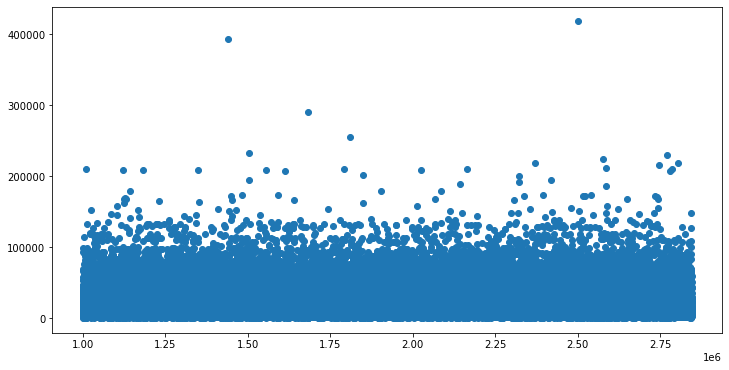

In [133]:
# Outliers of column "AMT_ANNUITY"
plt.figure(figsize=(12, 6))
plt.scatter(df_pr['SK_ID_PREV'],df_pr['AMT_ANNUITY'] )
plt.show()

In [134]:
df_pr1=df_pr[df_pr['AMT_ANNUITY']<200000] # retaining only the columns whos amount annunity is less than 200000

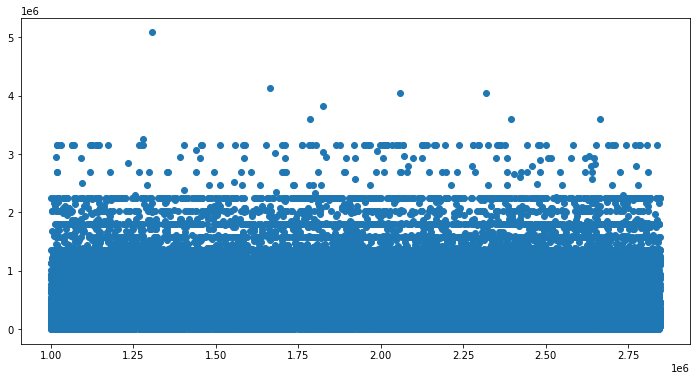

In [135]:
# Outliers of column "AMT_APPLICATION"
plt.figure(figsize=(12, 6))
plt.scatter(df_pr['SK_ID_PREV'],df_pr['AMT_APPLICATION'] )
plt.show()

In [136]:
df_pr1=df_pr1[df_pr1['AMT_APPLICATION']<3200000] # retaining only the columns whos AMT_APPLICATION is less than 3200000

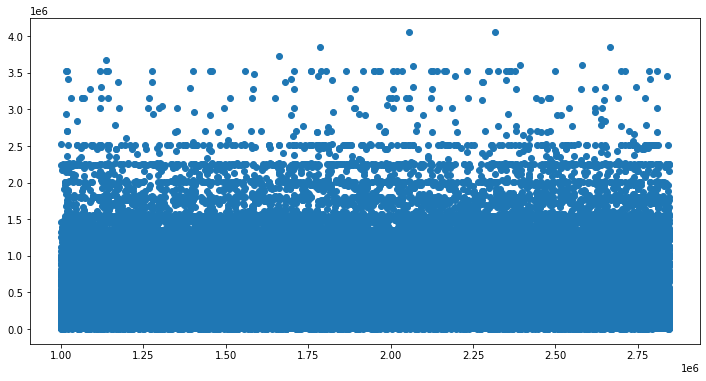

In [137]:
# Outliers of column "AMT_CREDIT"
plt.figure(figsize=(12, 6))
plt.scatter(df_pr['SK_ID_PREV'],df_pr['AMT_CREDIT'] )
plt.show()

In [138]:
df_pr1=df_pr1[df_pr1['AMT_CREDIT']<3500000] # retaining only the columns whos AMT_CREDIT is less than 3500000

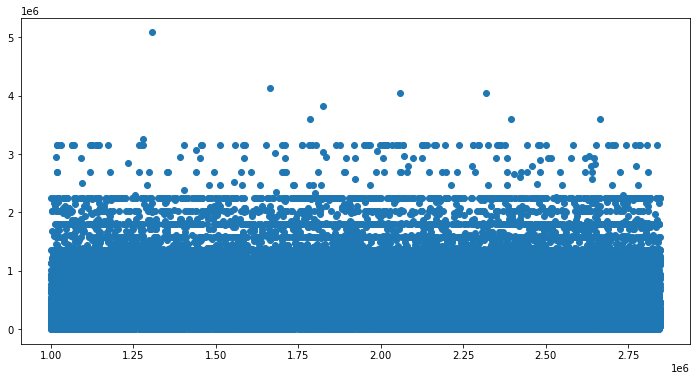

In [139]:
# Outliers of column "AMT_GOODS_PRICE"
plt.figure(figsize=(12, 6))
plt.scatter(df_pr['SK_ID_PREV'],df_pr['AMT_GOODS_PRICE'] )
plt.show()

In [140]:
df_pr1=df_pr1[df_pr1['AMT_GOODS_PRICE']<3300000] # retaining only the columns whos AMT_GOODS_PRICE is less than 3300000

#### Comapring DataFrames before and after the removal of outliers

In [141]:
print('Before ',df_pr.shape ,'AND After ' ,df_pr1.shape)
print('Total columns removed = ' ,df_pr.shape[0]-df_pr1.shape[0] )

Before  (249828, 10) AND After  (249750, 10)
Total columns removed =  78


### Creating Bins on columns having continious data

In [142]:
df_pr1['AMT_ANNUITY_BINS']=pd.qcut(df_pr1['AMT_ANNUITY'],4,labels=['Iow_annuity','Iow_medium_annuity','high_medium_annuity','upper_annuity'])
df_pr1['AMT_ANNUITY_BINS'].value_counts()

Iow_medium_annuity     63224
upper_annuity          62438
Iow_annuity            62438
high_medium_annuity    61650
Name: AMT_ANNUITY_BINS, dtype: int64

In [143]:
df_pr1['AMT_APPLICATION_BINS']=pd.qcut(df_pr1['AMT_APPLICATION'],4,labels=['Iow_app_amt','Iow_medium_app_amt','high_medium_app_amt','upper_app_amt'])
df_pr1['AMT_APPLICATION_BINS'].value_counts()

Iow_medium_app_amt     63298
high_medium_app_amt    62470
Iow_app_amt            62443
upper_app_amt          61539
Name: AMT_APPLICATION_BINS, dtype: int64

In [144]:
df_pr1['AMT_CREDIT_BINS']=pd.qcut(df_pr1['AMT_CREDIT'],4,labels=['Iow_amt_credit','Iow_medium_amt_credit','high_medium_amt_credit','upper_amt_credit'])
df_pr1['AMT_CREDIT_BINS'].value_counts()

high_medium_amt_credit    62845
Iow_medium_amt_credit     62438
Iow_amt_credit            62438
upper_amt_credit          62029
Name: AMT_CREDIT_BINS, dtype: int64

In [145]:
df_pr1['AMT_GOODS_PRICE_BINS']=pd.qcut(df_pr1['AMT_CREDIT'],4,labels=['Iow_goods_price','Iow_medium_goods_price','high_medium_goods_price','upper_goods_price'])
df_pr1['AMT_GOODS_PRICE_BINS'].value_counts()

high_medium_goods_price    62845
Iow_medium_goods_price     62438
Iow_goods_price            62438
upper_goods_price          62029
Name: AMT_GOODS_PRICE_BINS, dtype: int64

### Creating new DataFrames based on the NAME_CONTRACT_STATUS column values

In [146]:
df_pr1['NAME_CONTRACT_STATUS'].value_counts()

Approved        199460
Refused          47955
Canceled          2151
Unused offer       184
Name: NAME_CONTRACT_STATUS, dtype: int64

In [147]:
df_approved=df_pr1[df_pr1['NAME_CONTRACT_STATUS']=='Approved']

In [148]:
df_refused=df_pr1[df_pr1['NAME_CONTRACT_STATUS']=='Refused']

In [149]:
df_refused.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,NAME_CONTRACT_STATUS,CODE_REJECT_REASON,NAME_PRODUCT_TYPE,AMT_ANNUITY_BINS,AMT_APPLICATION_BINS,AMT_CREDIT_BINS,AMT_GOODS_PRICE_BINS
36,2766278,178375,Consumer loans,7511.085,32490.0,38380.5,32490.0,Refused,LIMIT,XNA,Iow_medium_annuity,Iow_app_amt,Iow_amt_credit,Iow_goods_price
105,1067163,422466,Cash loans,43067.475,630000.0,673245.0,630000.0,Refused,HC,x-sell,upper_annuity,upper_app_amt,upper_amt_credit,upper_goods_price
137,2255346,135347,Consumer loans,12037.590,89100.0,97920.0,89100.0,Refused,HC,XNA,high_medium_annuity,Iow_medium_app_amt,Iow_medium_amt_credit,Iow_medium_goods_price
163,1979918,246553,Consumer loans,2430.990,20205.0,22783.5,20205.0,Refused,LIMIT,XNA,Iow_annuity,Iow_app_amt,Iow_amt_credit,Iow_goods_price
232,2663511,421088,Revolving loans,3150.000,0.0,45000.0,0.0,Refused,HC,walk-in,Iow_annuity,Iow_app_amt,Iow_amt_credit,Iow_goods_price


#### univariate analysis

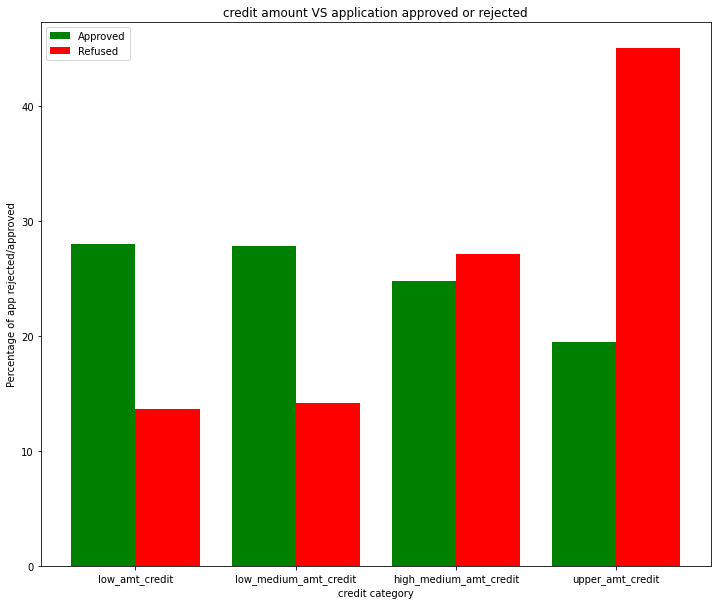

In [150]:
fig=plt.figure(figsize=(12,10))
ax=fig.add_subplot(111)
ax.set(title='credit amount VS application approved or rejected',xlabel='credit category',ylabel='Percentage of app rejected/approved')
x0 = df_approved['AMT_CREDIT_BINS']
x1 = df_refused['AMT_CREDIT_BINS']
unique_0,counts_0 = np.unique(x0,return_counts=True)
unique_1,counts_1 = np.unique(x1,return_counts=True)
a= sum(counts_0)
ax.bar(unique_0,counts_0/a*100,color='green',label='Approved',width=-0.4,align='edge')
b= sum(counts_1)
ax.bar(unique_1,counts_1/b*100,color='Red',label='Refused',width=0.4,align='edge')
ax.legend()
plt.show()


#### 'From the graph obatained from credit amount VS loan payability in the application data analysis we found that - People with high credit amounts are most likely to pay the credit,as well as low credit amounts most likely pay the amounts,and also found that Among all the categories, low medium credits are most likely unpay'
### Here we see more low_medium credits being approved, which may increase the risk of incuring loss to the company, also upper_amt_credit who are likely to pay credits in time being rejected in most times, further increases the loss to the company

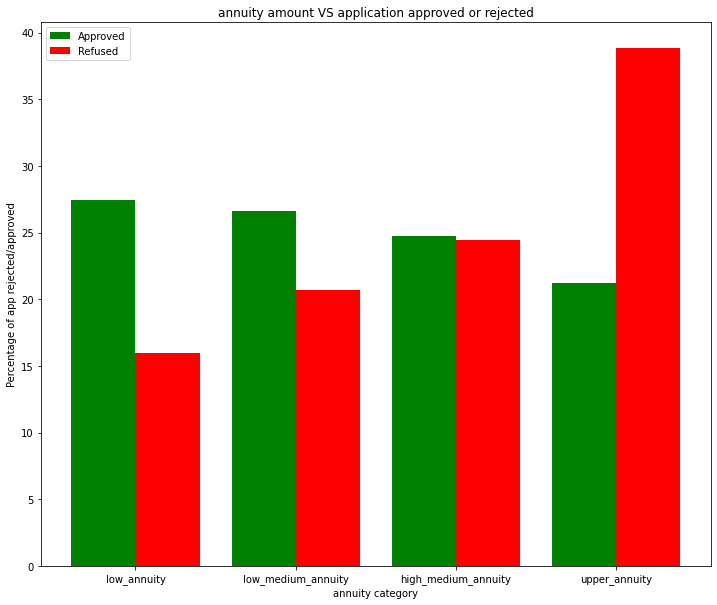

In [151]:
fig=plt.figure(figsize=(12,10))
ax=fig.add_subplot(111)
ax.set(title='annuity amount VS application approved or rejected',xlabel='annuity category',ylabel='Percentage of app rejected/approved')
x0 = df_approved['AMT_ANNUITY_BINS']
x1 = df_refused['AMT_ANNUITY_BINS']
unique_0,counts_0 = np.unique(x0,return_counts=True)
unique_1,counts_1 = np.unique(x1,return_counts=True)
a= sum(counts_0)
ax.bar(unique_0,counts_0/a*100,color='green',label='Approved',width=-0.4,align='edge')
b= sum(counts_1)
ax.bar(unique_1,counts_1/b*100,color='Red',label='Refused',width=0.4,align='edge')
ax.legend()
plt.show()

#### From the graph obatained from annuity amount VS loan payability in the application data analysis we found that-People with medium annuity amounts are more likely unpay the credits and People with low as well as high annuity amounts pays the credit

### Here we see more pupper_annuity  being refused in most times, which may increase the risk of incuring loss to the company

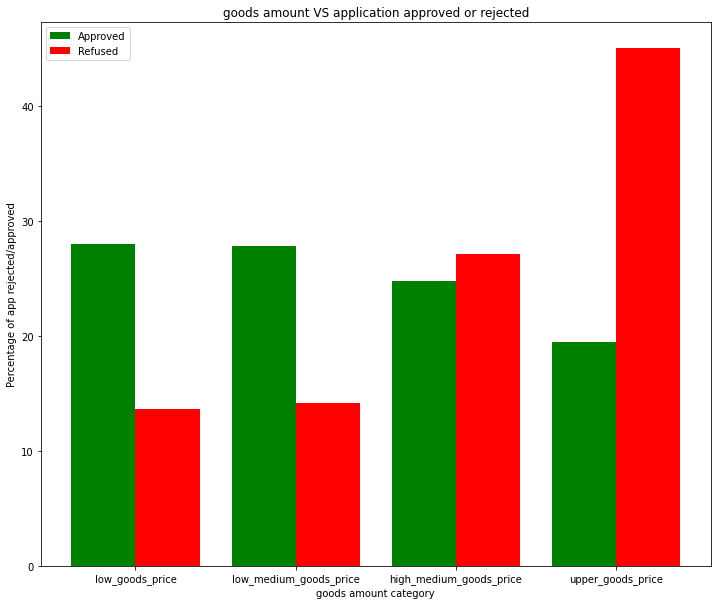

In [152]:
fig=plt.figure(figsize=(12,10))
ax=fig.add_subplot(111)
ax.set(title='goods amount VS application approved or rejected',xlabel='goods amount category',ylabel='Percentage of app rejected/approved')
x0 = df_approved['AMT_GOODS_PRICE_BINS']
x1 = df_refused['AMT_GOODS_PRICE_BINS']
unique_0,counts_0 = np.unique(x0,return_counts=True)
unique_1,counts_1 = np.unique(x1,return_counts=True)
a= sum(counts_0)
ax.bar(unique_0,counts_0/a*100,color='green',label='Approved',width=-0.4,align='edge')
b= sum(counts_1)
ax.bar(unique_1,counts_1/b*100,color='Red',label='Refused',width=0.4,align='edge')
ax.legend()
plt.show()


- From the graph obatained from goods amount VS loan payability in the application data analysis People with low medium goods amounts  are mostly likely unpay the credits,while rest pays the credits also People with high goods amounts have very least percetage of defaulters,and they are most likely to pay credits amoungst all categories

- Here in the above graph we see that the application of upper_goods_price being rejected in most of the times.
- Also, low_medium category has highest ratio of credit non payment, but here we see that most of the applicaions of low_medium being sactioned, which may leads to loss to the company
